In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from importlib import reload
import os
import glob2
import pandas as pd
import numpy as np
import sys
import hpfspecmatch
import hpfspec

In [23]:
from __future__ import print_function
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster",font_scale=1.2,rc={"font":"helvetica"}); 
sns.set_style("white")
sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
from importlib import reload
import matplotlib
matplotlib.rc_file(matplotlib.matplotlib_fname())
%matplotlib inline
%config InlineBackend.figure_format = "retina"
#%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
#%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=7
rcParams['xtick.minor.width']=1
rcParams['xtick.minor.size']=4
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=7
rcParams['ytick.minor.width']=1
rcParams['ytick.minor.size']=4
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['axes.formatter.limits'] = -10,10


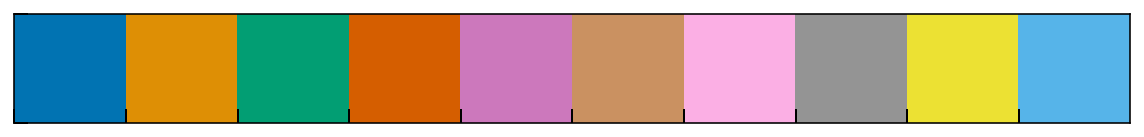

In [24]:
sns.palplot(cp)

# Libraries

In [25]:
#20200128_specmatch_nir
lib1 = pd.read_csv(hpfspecmatch.config.PATH_LIBRARY_DB)
lib1
print(lib1.columns)
print(min(lib1['[Fe/H]']))
print(max(lib1['[Fe/H]']))

Index(['Name', 'Teff', 'e_Teff', 'R*', 'e_R*', 'log(g)', 'e_log(g)', '[Fe/H]',
       'e_[Fe/H]', 'M*', 'e_M*', 'logAge', 'e_logAge', 'plx', 'Vmag', 'Notes',
       'SCat', 'unknown', 'Gaia', '2M', 'Simbad', '_RA', '_DE',
       'simbadnames_x', 'ID_NAME', 'OBJECT_ID', 'filename', 'exptime', 'sn18',
       'qprog', 'rv', 'basenames', 'simbadnames_y'],
      dtype='object')
-0.49
0.53


In [27]:
file1 = '../library/20210406_specmatch_nir_library/FITS/99_221822/Slope-20200801T105922_R01.optimal.fits' #G
file2 = '../library/20210406_specmatch_nir_library/FITS/397_GL699/Slope-20181003T014556_R01.optimal.fits' #M

H1 = hpfspec.HPFSpectrum(file1)
H2 = hpfspec.HPFSpectrum(file2)



Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/NLTT_57303.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -12.16667+- 0.00000km/s
RVabs iteration #2: -12.14184+- 0.00000km/s
berv=20.682710614737598,rv=-12.141844592353674
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -110.50000+- 0.00000km/s
RVabs iteration #2: -110.59246+- 0.00000km/s
berv=-25.998887018907872,rv=-110.59245862847588


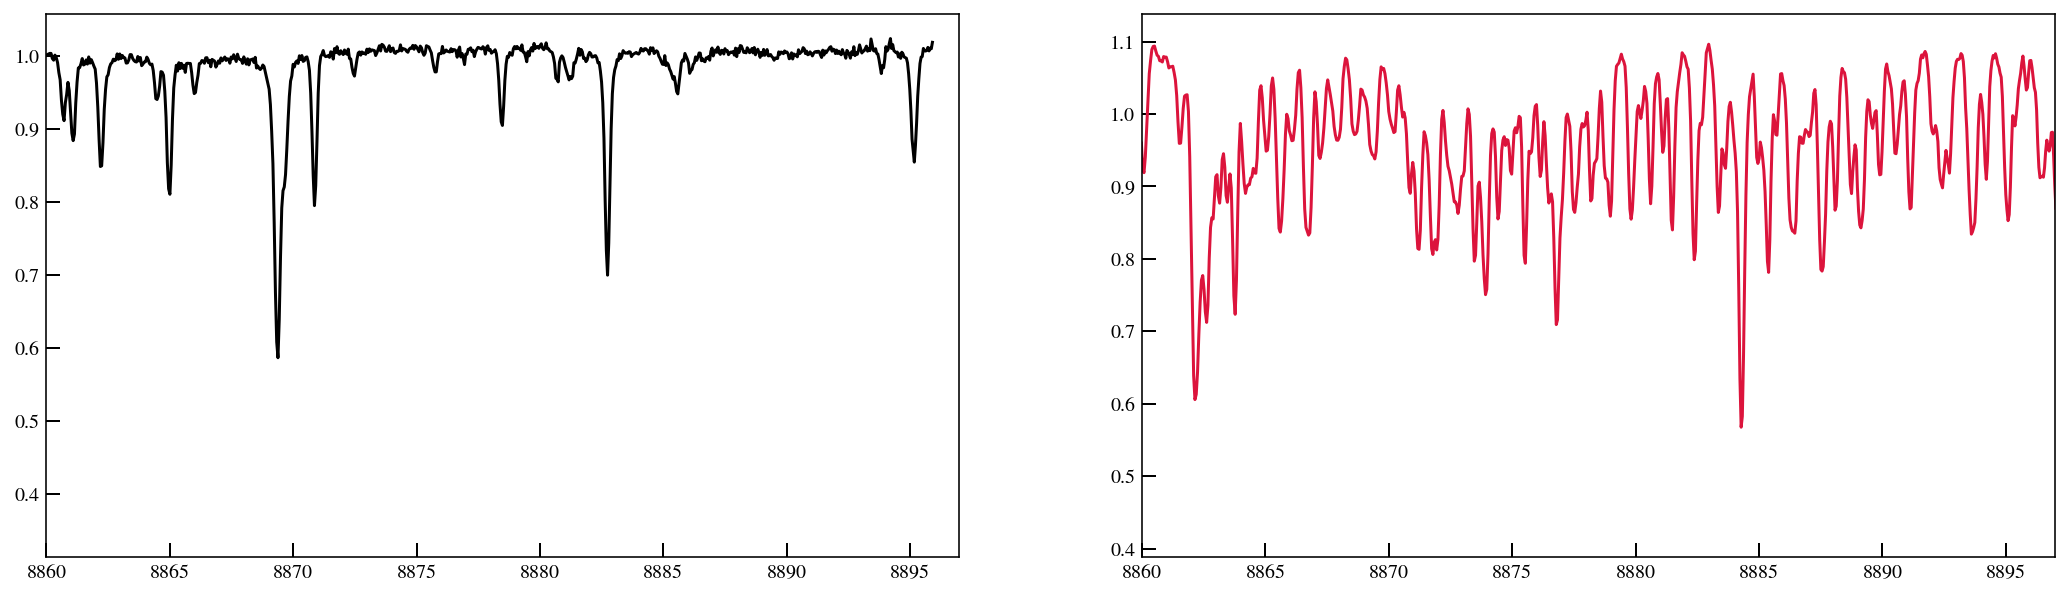

In [41]:
fig = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
bx = plt.subplot(gs[0, 1])

o = 6
wstart = 8860
wend = 8897

ax.set_xlim(wstart,wend)
bx.set_xlim(wstart,wend)

ax.plot(H1.w_shifted[o], H1.f_debl[o],color='black')
bx.plot(H2.w_shifted[o], H2.f_debl[o],color='crimson')



Text(0, 0.5, 'Flux')

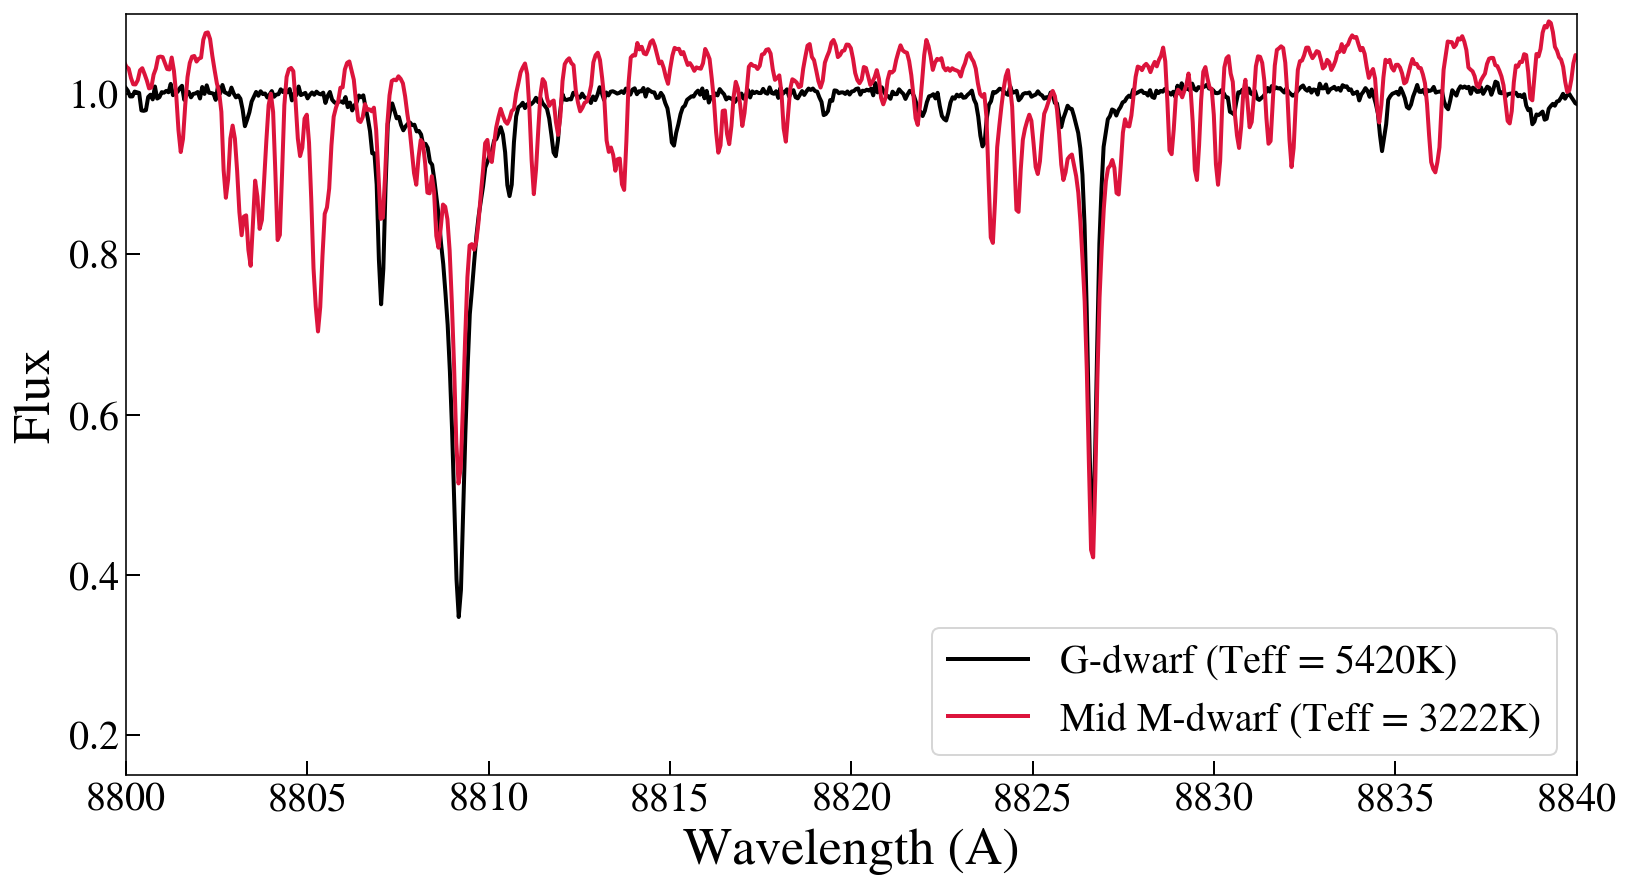

In [65]:
fig = plt.figure(figsize=(13,7))

o = 6
wstart = 8800
wend = 8840

plt.xlim(wstart,wend)
plt.ylim(0.15,1.1)

plt.plot(H1.w_shifted[o], H1.f_debl[o],color='black',label= 'G-dwarf (Teff = 5420K)', lw=2)
plt.plot(H2.w_shifted[o], H2.f_debl[o],color='crimson', label='Mid M-dwarf (Teff = 3222K)', lw=2)

plt.legend(loc='lower right',fontsize=20)

plt.tick_params(labelsize = 20)

plt.xlabel('Wavelength (A)', fontsize=26)
plt.ylabel('Flux', fontsize=26)

<ErrorbarContainer object of 3 artists>

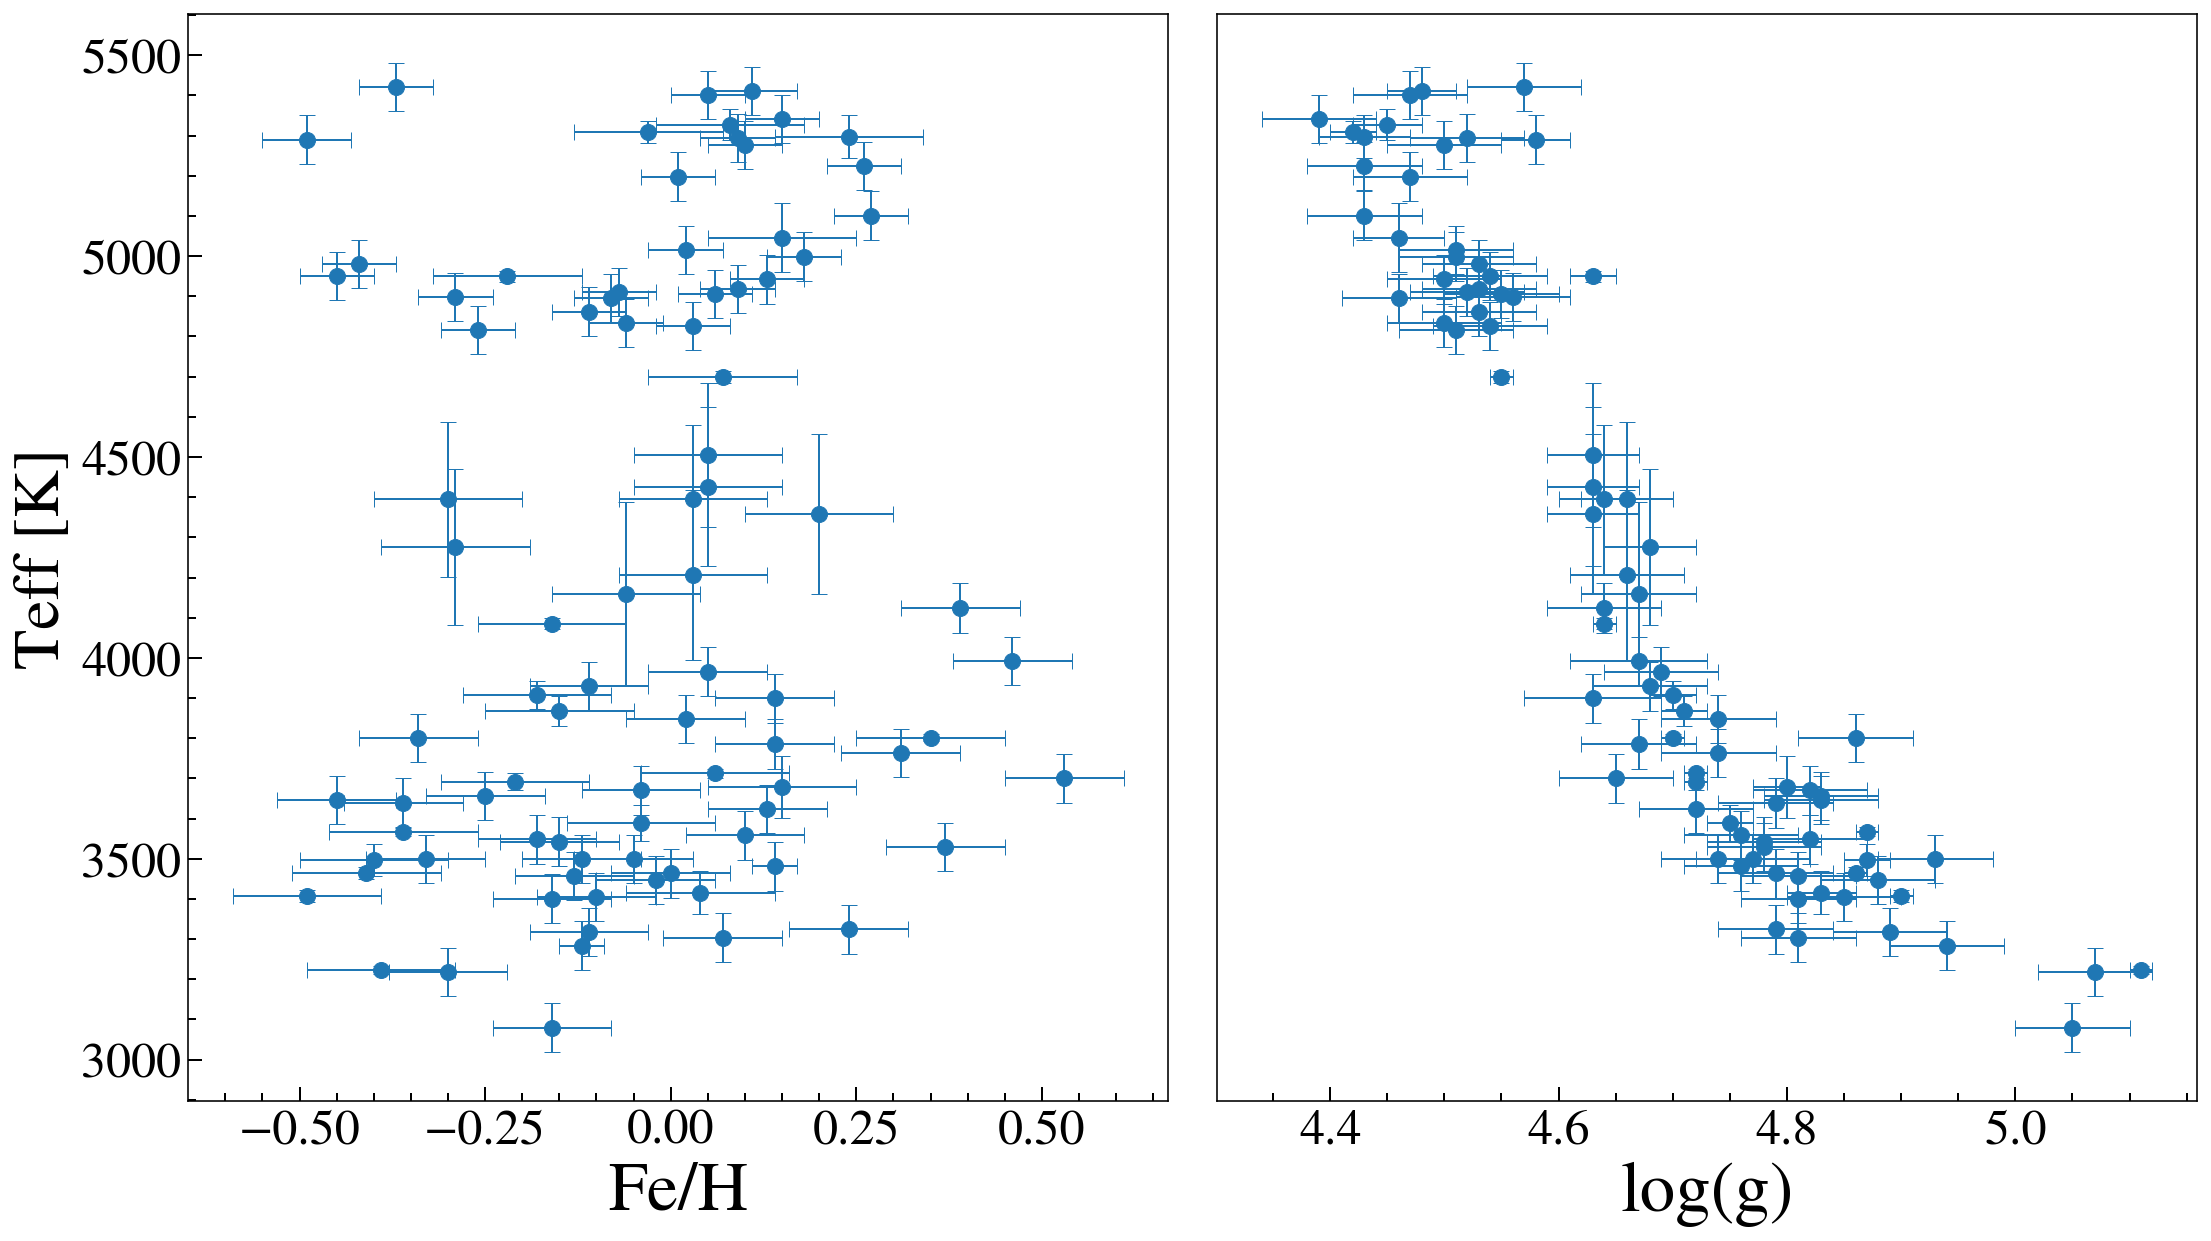

In [16]:
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
bx = plt.subplot(gs[0, 1])

ax.set_ylabel('Teff [K]',fontsize=33)
ax.set_xlabel('Fe/H',fontsize=35)
bx.set_xlabel('log(g)',fontsize=35.5)

ax.tick_params(labelsize=25)
bx.tick_params(labelsize=25)
ax.minorticks_on()
bx.minorticks_on()

bx.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(wspace=0.05)

#set_title('Library 2020-01-28 (55)')

#ax.scatter(lib1['[Fe/H]'], lib1['Teff'])
#bx.scatter(lib1['log(g)'], lib1['Teff'])

ax.errorbar(lib1['[Fe/H]'], lib1['Teff'],lib1['e_Teff'],lib1['e_[Fe/H]'],lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)
bx.errorbar(lib1['log(g)'], lib1['Teff'],lib1['e_Teff'],lib1['e_log(g)'],lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)

In [4]:
#20201008_specmatch_nir
lib2 = pd.read_csv('../library/20201008_specmatch_nir/20201008_specmatch_nir.csv')
lib2
print(lib2.columns)
print(min(lib2['log(g)']))
print(max(lib2['log(g)']))

Index(['Name', 'Teff', 'e_Teff', 'R*', 'e_R*', 'log(g)', 'e_log(g)', '[Fe/H]',
       'e_[Fe/H]', 'M*', 'e_M*', 'logAge', 'e_logAge', 'plx', 'Vmag', 'Notes',
       'SCat', 'unknown', 'Gaia', '2M', 'Simbad', '_RA', '_DE',
       'simbadnames_x', 'ID_NAME', 'OBJECT_ID', 'filename', 'exptime', 'sn18',
       'qprog', 'rv', 'basenames', 'simbadnames_y'],
      dtype='object')
4.39
5.11


<ErrorbarContainer object of 3 artists>

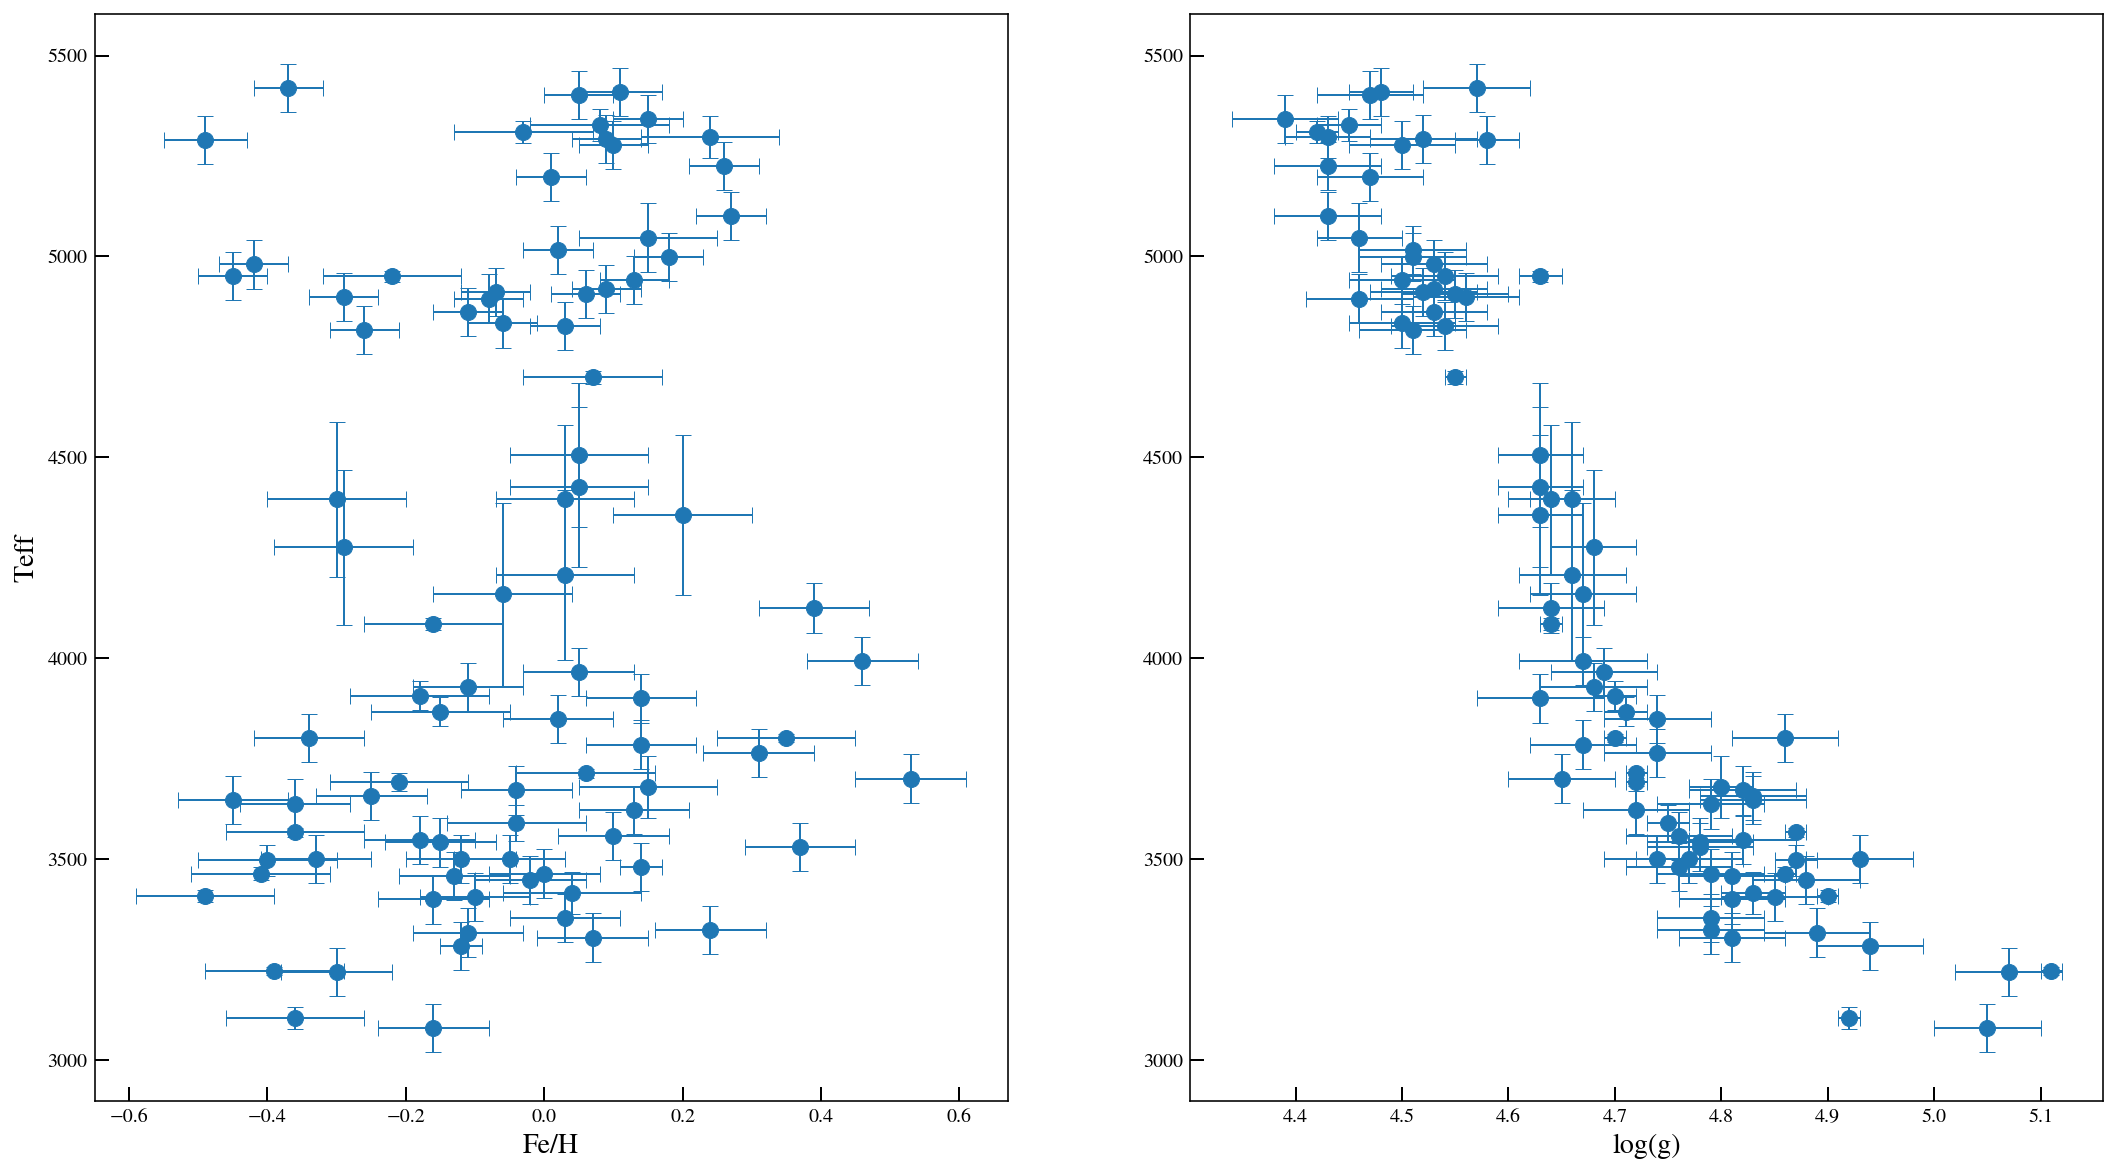

In [8]:
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
bx = plt.subplot(gs[0, 1])

ax.scatter(lib2['[Fe/H]'], lib2['Teff'])
bx.scatter(lib2['log(g)'], lib2['Teff'])

ax.set_ylabel('Teff',fontsize=14)
ax.set_xlabel('Fe/H',fontsize=14)
bx.set_xlabel('log(g)',fontsize=14)

ax.errorbar(lib2['[Fe/H]'], lib2['Teff'],lib2['e_Teff'],lib2['e_[Fe/H]'],lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)
bx.errorbar(lib2['log(g)'], lib2['Teff'],lib2['e_Teff'],lib2['e_log(g)'],lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)

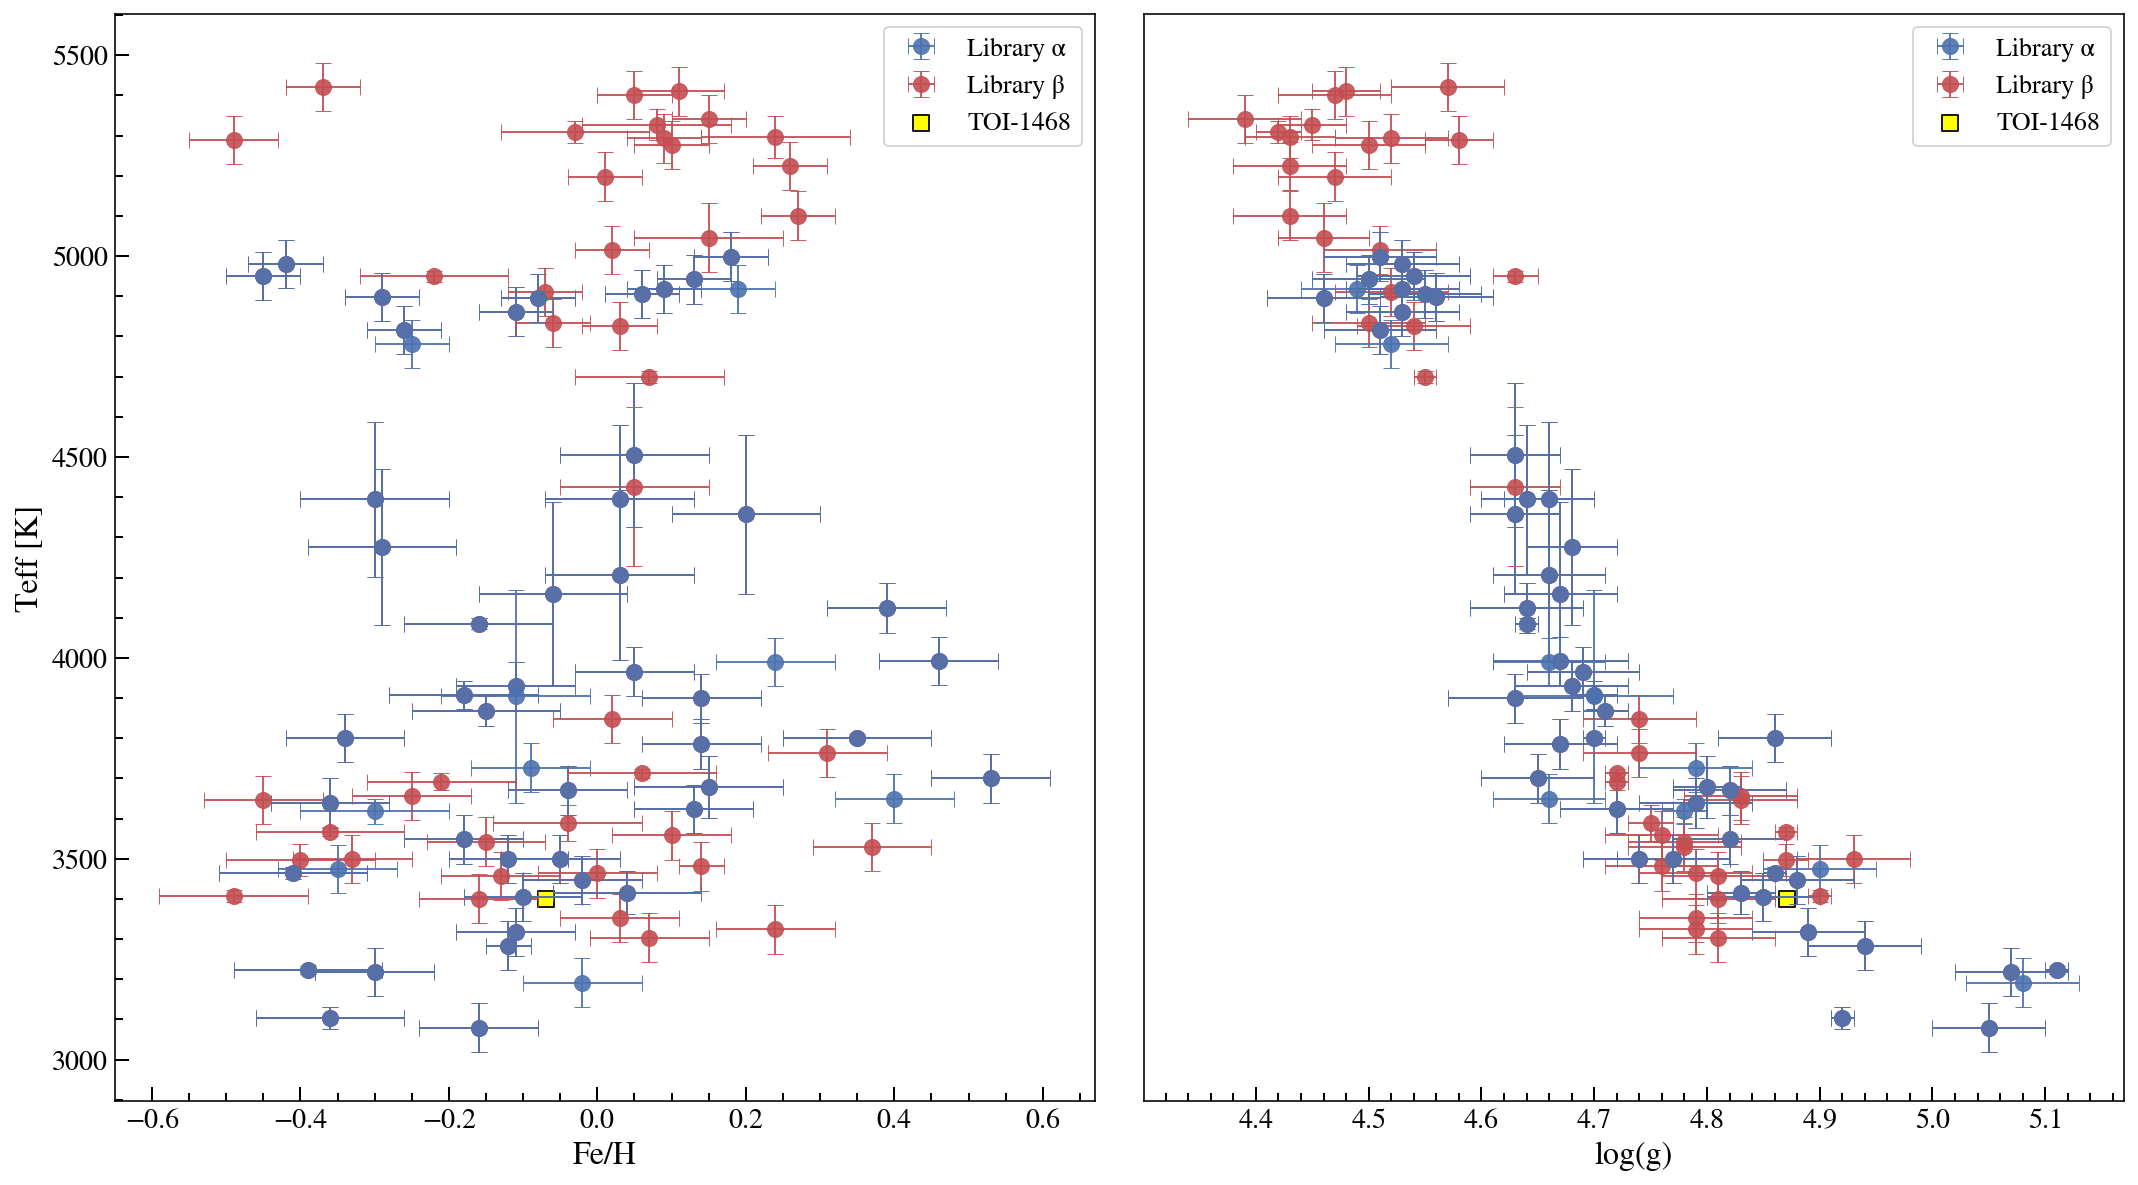

In [36]:
#both feh
fig = plt.figure(figsize=(18,10))

gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
bx = plt.subplot(gs[0, 1])

ax.set_ylabel('Teff [K]',fontsize=16)
ax.set_xlabel('Fe/H',fontsize=16)
bx.set_xlabel('log(g)',fontsize=16)

ax.tick_params(labelsize=14)
bx.tick_params(labelsize=14)
ax.minorticks_on()
bx.minorticks_on()

bx.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(wspace=0.05)

ax.errorbar(lib2['[Fe/H]'], lib2['Teff'],lib2['e_Teff'],lib2['e_[Fe/H]'],c='r',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label = 'Library \u03B2')
ax.errorbar(lib1['[Fe/H]'], lib1['Teff'],lib1['e_Teff'],lib1['e_[Fe/H]'],c='b',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label= 'Library \u03B1')
ax.scatter(-0.06976939470475964,3398.7295563518005, c = 'yellow',edgecolors ='k', marker="s",s=70,label='TOI-1468')

bx.errorbar(lib2['log(g)'], lib2['Teff'],lib2['e_Teff'],lib2['e_log(g)'],c='r',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label = 'Library \u03B2')
bx.errorbar(lib1['log(g)'], lib1['Teff'],lib1['e_Teff'],lib1['e_log(g)'],c='b',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label= 'Library \u03B1')
bx.scatter(4.871007895687054,3398.7295563518005, c = 'yellow', edgecolors ='k',marker="s",s=70,label='TOI-1468')

handlesa,labelsa = ax.get_legend_handles_labels()
handlesb,labelsb = bx.get_legend_handles_labels()

handlesa = [handlesa[2], handlesa[1], handlesa[0]]
labelsa = [labelsa[2], labelsa[1],labelsa[0]]

handlesb = [handlesb[2], handlesb[1], handlesb[0]]
labelsb = [labelsb[2], labelsb[1],labelsb[0]]

ax.legend(handlesa,labelsa,fontsize=13, loc = 'upper right')
bx.legend(handlesb,labelsb,fontsize=13, loc = 'upper right')

fig.savefig('../output/20201020_hpf_gto_targets/overview/library_plot.png',dpi=200)

# GTO Targets

In [9]:
gto = pd.read_csv('../output/gto_summary.csv')
gto

,target,teff,std teff,logg,std logg,feh,std feh,vsini,std vsini
0,NLTT_47026,3.080125e+03,1.303558e+01,5.049992e+00,1.024268e-02,-1.600286e-01,2.024211e-02,5.668308e-02,1.391970e-01
1,LHS_3154,3.080064e+03,1.284420e+00,5.049987e+00,2.373005e-04,-1.600190e-01,1.362521e-03,2.671452e-01,8.261034e-02
2,GJ_9066,3.080068e+03,3.174061e-02,5.049983e+00,2.052017e-05,-1.600386e-01,2.731143e-05,3.058016e-01,2.609010e-02
3,GJ_1151,3.186051e+03,1.818705e+01,5.063424e+00,4.347384e-02,-2.539998e-01,7.822118e-02,2.342825e-01,1.249281e-01
4,VB_10,3.080063e+03,1.257701e-01,5.049980e+00,1.413828e-04,-1.600170e-01,2.049311e-04,2.532596e-01,2.309370e-01
5,GJ_251,3.447991e+03,7.605011e-03,4.879994e+00,9.338547e-06,-2.000694e-02,2.812737e-05,3.457605e-01,1.042067e-01
6,GJ_1215,3.170562e+03,2.519253e+01,5.057502e+00,5.739915e-02,-2.125129e-01,1.105697e-01,1.996161e-01,7.988110e-02
7,GJ_1154,3.096271e+03,2.113796e+01,5.049990e+00,1.789597e-02,-1.600108e-01,2.893315e-02,5.626761e+00,6.167297e-01
8,GJ_4037,3.080054e+03,1.290031e-01,5.049994e+00,1.129584e-04,-1.600295e-01,1.296936e-04,2.571655e-01,1.229851e-01
9,LHS_3241,3.080076e+03,3.373933e-01,5.049974e+00,3.472821e-04,-1.600181e-01,5.174638e-04,2.880283e-01,1.011407e-01


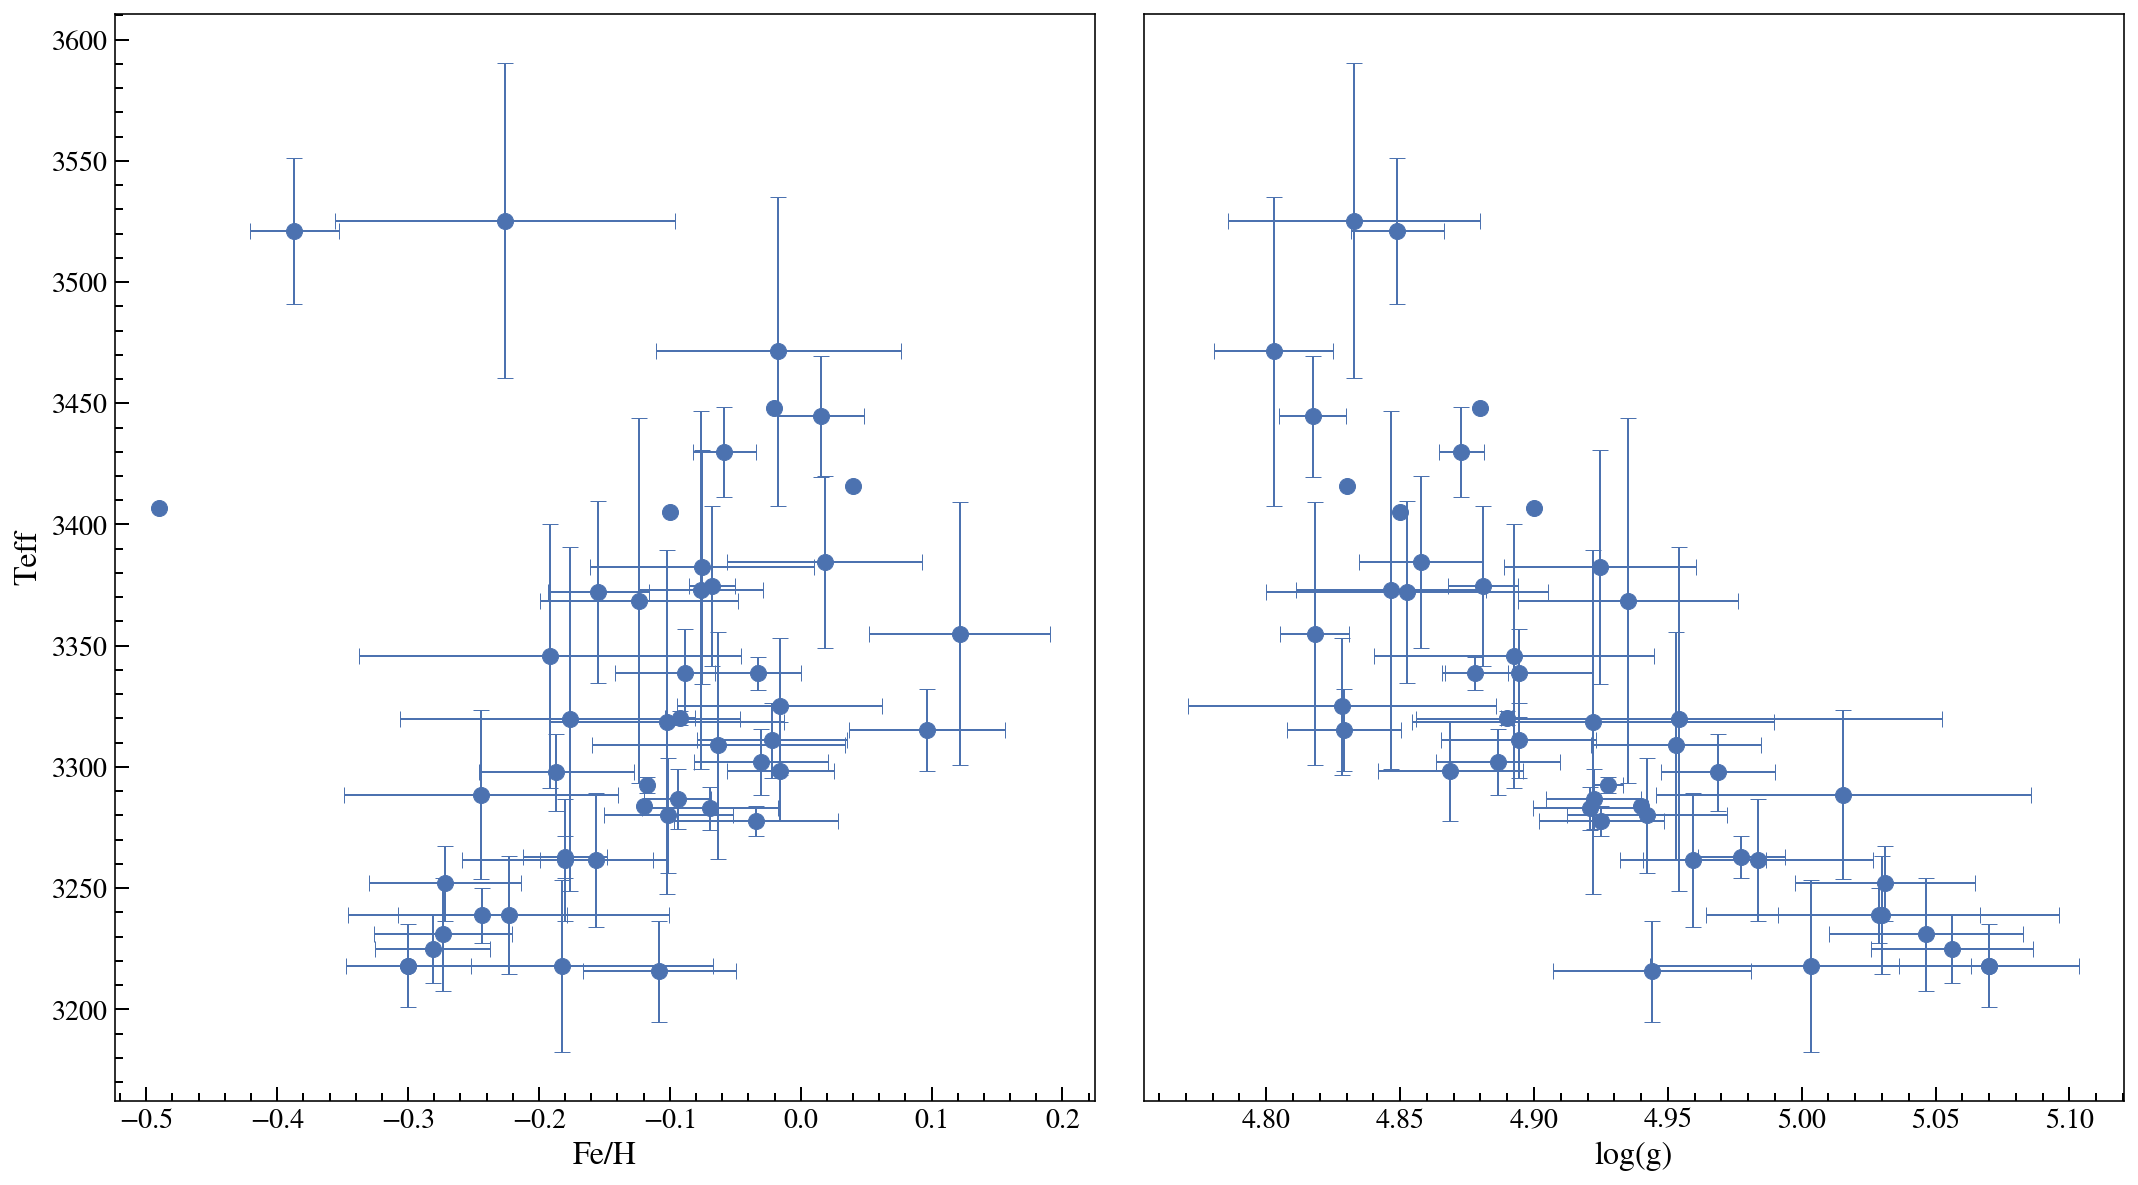

In [47]:
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
bx = plt.subplot(gs[0, 1])

ax.set_ylabel('Teff',fontsize=16)
ax.set_xlabel('Fe/H',fontsize=16)
bx.set_xlabel('log(g)',fontsize=16)

ax.tick_params(labelsize=14)
bx.tick_params(labelsize=14)
ax.minorticks_on()
bx.minorticks_on()

bx.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(wspace=0.05)

for i,temp in enumerate(gto['teff']):
    if temp > 3200 and temp < 4000:
        ax.errorbar(gto['feh'][i], gto['teff'][i],gto['std teff'][i],gto['std feh'][i],c='b',lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)
        bx.errorbar(gto['logg'][i], gto['teff'][i],gto['std teff'][i],gto['std logg'][i],c='b',lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)

In [51]:
carmenes = pd.read_csv('../output/20201020_hpf_gto_targets/overview/carmenes_in_hpfgeneral.csv')
carmenes

,Karmn,Name,Teff,e_Teff,SpType,logg,e_logg,loggc,e_loggc,[Fe/H],e_[Fe/H],Lum,e_Lum,d,e_d,r_d,Rad,e_Rad,RadP,e_RadP,MassMR,e_MassMR,MassMMKs,e_MassMMKs,MassLogg,e_MassLogg,MassP,e_MassP,Com,RA,Dec,Pref_Name,SIMBAD,Jmag,Vmag,PMRA,PMDEC,HPF_OBJECT,HPF_FILE
0,J00067-075,GJ 1002,3061,51,dM5.5,5.19,0.07,5.255,0.045,-0.13,0.16,0.001403,0.000017,4.8494,0.00310,GAIA2,0.1331,0.0045,0.1518,0.00220,0.11640,0.0092,0.1148,0.0028,0.10010,0.018,0.1230,0.00190,,1.679988,-7.538062,GJ_1002,G 158-27,8.323,13.837,-811.480,-1892.905,GJ_1002,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
1,J00184+440,Gl 15B,3291,51,dM3.5,5.11,0.07,5.143,0.038,-0.19,0.16,0.003511,0.000035,3.5614,0.00063,GAIA2,0.1822,0.0057,0.1985,0.00270,0.16820,0.0100,0.1623,0.0041,0.15610,0.027,0.1749,0.00260,,4.607602,44.027247,GJ_15_B,V* GQ And,6.789,11.040,2863.284,336.529,GJ_15_B,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
2,J02002+130,Gl 83.1,3193,51,dM3.5,5.15,0.07,5.180,0.040,-0.19,0.16,0.002540,0.000020,4.4717,0.00220,GAIA2,0.1646,0.0053,0.1876,0.00190,0.14970,0.0098,0.1478,0.0036,0.13970,0.024,0.1601,0.00170,,30.053984,13.051950,LHS_11,V* TZ Ari,7.514,12.298,1096.565,-1772.865,GJ_9066,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
3,J02088+494,GJ 3136,3315,51,dM3.5,5.08,0.07,4.833,0.033,-0.11,0.16,0.017500,0.000210,17.0650,0.02300,GAIA2,0.4009,0.0130,0.4085,0.00440,0.39900,0.0170,0.3752,0.0092,0.70520,0.120,0.4121,0.00450,,32.223434,49.449011,GJ_3136,G 173-39,8.423,NaN,236.718,-291.388,GJ_3136,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
4,J02336+249,Gl 102,3283,51,dM4.0,5.09,0.07,5.052,0.036,-0.09,0.16,0.005595,0.000061,9.9721,0.01100,GAIA2,0.2311,0.0073,0.2581,0.00280,0.21980,0.0110,0.2122,0.0051,0.23980,0.042,0.2395,0.00350,,38.404897,24.927137,GJ_102,G 36-24,8.472,NaN,48.818,-676.167,GJ_102,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
5,J02362+068,Gl 105B,3327,51,dM4.0,5.03,0.07,4.990,0.034,0.05,0.16,0.008117,0.000120,7.2223,0.00470,GAIA2,0.2711,0.0085,0.3058,0.00470,0.26200,0.0130,0.2522,0.0062,0.28740,0.050,0.2969,0.00550,,39.063611,6.871646,GJ_105_B,V* BX Cet,7.333,NaN,1801.837,1449.914,GJ_105_B,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
6,J02530+168,Teegarden's Star,2904,51,dM7.0,5.26,0.07,5.329,0.053,-0.19,0.16,0.000730,0.000011,3.8313,0.00400,GAIA2,0.1067,0.0038,0.1307,0.00150,0.08857,0.0088,0.0934,0.0026,0.07561,0.013,0.1026,0.00110,,43.253714,16.881289,LSPM_J0253+1652,NAME Teegarden's Star,8.394,NaN,3429.534,-3806.161,Teegarden,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
7,J05019+011,1RXS J050156.7+010845,3225,51,dM4.0,5.13,0.07,4.674,0.033,-0.15,0.16,0.033870,0.000470,25.2840,0.05100,GAIA2,0.5893,0.0190,0.6103,0.01700,0.59780,0.0240,0.4995,0.0120,1.71000,0.300,0.3836,0.07500,Out,75.486082,1.145250,2MASS_J05015665+0108429,UCAC4 456-008319,8.526,12.859,33.954,-90.715,2MASS_J05015665+0108429,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
8,J05019-069,GJ 3323,3288,51,dM4.0,5.07,0.07,5.134,0.038,0.01,0.16,0.003654,0.000052,5.3758,0.00170,GAIA2,0.1862,0.0059,0.2094,0.00310,0.17240,0.0100,0.1705,0.0044,0.14870,0.026,0.1849,0.00320,,75.489275,-6.946214,GJ_3323,LP 656-38,7.617,12.196,-551.722,-533.936,GJ_3323,/gpfs/group/cfb12/default/HPFData/Processed/Wa...
9,J05421+124,Gl 213,3311,51,dM4.0,5.05,0.07,5.035,0.035,0.01,0.16,0.006329,0.000083,5.7901,0.00270,GAIA2,0.2417,0.0076,0.2748,0.00240,0.23100,0.0120,0.2182,0.0052,0.23920,0.041,0.2603,0.00400,,85.538613,12.489336,GJ_213,Ross 47,7.124,11.509,1997.706,-1569.794,GJ_213,/gpfs/group/cfb12/default/HPFData/Processed/Wa...


<ErrorbarContainer object of 3 artists>

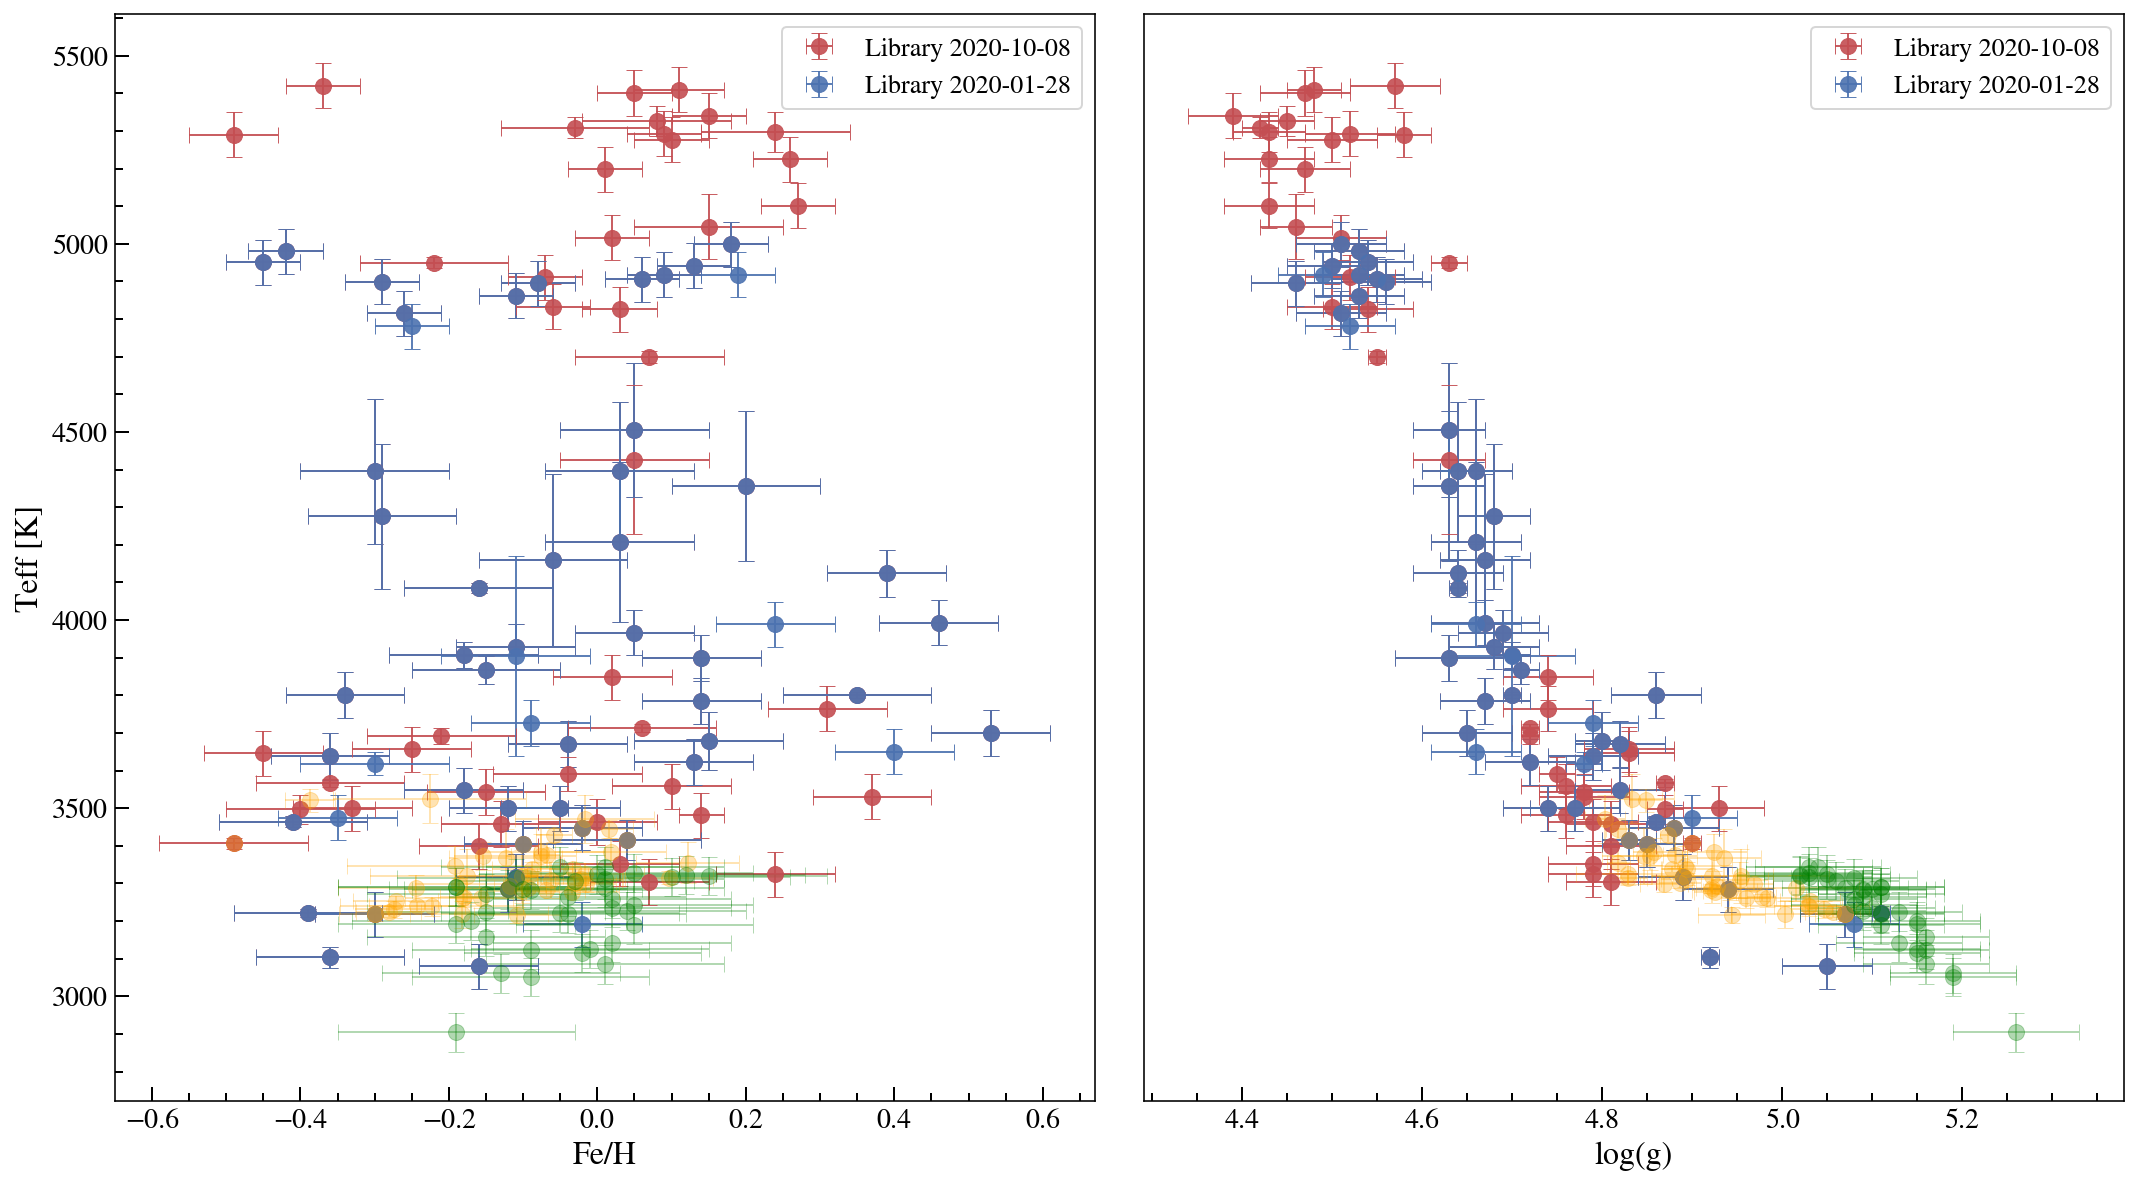

In [54]:
#both feh
fig = plt.figure(figsize=(18,10))

gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
bx = plt.subplot(gs[0, 1])

ax.set_ylabel('Teff [K]',fontsize=16)
ax.set_xlabel('Fe/H',fontsize=16)
bx.set_xlabel('log(g)',fontsize=16)

ax.tick_params(labelsize=14)
bx.tick_params(labelsize=14)
ax.minorticks_on()
bx.minorticks_on()

bx.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(wspace=0.05)

ax.errorbar(lib2['[Fe/H]'], lib2['Teff'],lib2['e_Teff'],lib2['e_[Fe/H]'],c='r',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label = 'Library 2020-10-08')
ax.errorbar(lib1['[Fe/H]'], lib1['Teff'],lib1['e_Teff'],lib1['e_[Fe/H]'],c='b',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label= 'Library 2020-01-28')

bx.errorbar(lib2['log(g)'], lib2['Teff'],lib2['e_Teff'],lib2['e_log(g)'],c='r',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label = 'Library 2020-10-08')
bx.errorbar(lib1['log(g)'], lib1['Teff'],lib1['e_Teff'],lib1['e_log(g)'],c='b',alpha = 0.9, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label= 'Library 2020-01-28')

ax.legend(fontsize=13, loc = 'upper right')
bx.legend(fontsize=13)

for i,temp in enumerate(gto['teff']):
    if temp > 3200 and temp < 4000:
        ax.errorbar(gto['feh'][i], gto['teff'][i],gto['std teff'][i],gto['std feh'][i],c='orange',alpha = 0.3,lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)
        bx.errorbar(gto['logg'][i], gto['teff'][i],gto['std teff'][i],gto['std logg'][i],c='orange',alpha = 0.3,lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4)

ax.errorbar(carmenes['[Fe/H]'], carmenes['Teff'],carmenes['e_Teff'],carmenes['e_[Fe/H]'],c='green',alpha = 0.3, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label = 'Library 2020-10-08')
bx.errorbar(carmenes['logg'], carmenes['Teff'],carmenes['e_Teff'],carmenes['e_logg'],c='green',alpha = 0.3, lw=0,elinewidth=1.,marker="o",mew=0.5,markersize=8,capsize=4,label = 'Library 2020-10-08')



In [16]:
master = pd.read_csv('../output/master.csv')
master

,ticid,target,group,quality,teff,std teff,logg,std logg,feh,std feh,vsini,std vsini,tess_notes,likely_rotation_period,tess_clear_modulation,tess_flare,tess_nearby_stars,brightest_fratio,max_period_1_gls,max_period_1_gls_fap,TESS_time_baseline,TESS_std_2min,max_period_2_gls,max_period_3_gls,max_period_2_gls_fap,max_period_3_gls_fap,max_period_1_gls_ncycles,TESS_nsectors,TESS_median_error_2min
0,400024907,2MASS_J01135101+3505220,A,1,3471.410,63.585700,4.802752,0.022167,-0.017150,0.093491,1.361302,0.410078,"Very flat, likely slow rotator",slow rotator,N,N,N,0.015764,11.548679,1.000000e+00,23.09736,0.001609,2.099760,3.299622,1.000000e+00,1.000000e+00,2.0,1.0,0.001689
1,156691155,2MASS_J14253465+2540050,A,0,3080.044,0.038287,5.049995,0.000035,-0.160000,0.000064,0.237000,0.122536,"We see a flare, but likely slow rotator, FAP=1...",slow rotator,?,Y,N,0.012848,24.544818,1.000000e+00,24.54482,0.008067,3.068102,4.908964,1.000000e+00,1.000000e+00,1.0,1.0,0.012727
2,459977474,2MASS_J17023016+6145060,A,1,3374.503,32.945980,4.880000,0.013000,-0.067800,0.017500,1.000000,0.739769,"Lots of sectors, all peaks > 12 days. Some sec...",NaN,?,?,1.5 mag brighter nearby,4.351826,12.455289,1.770000e-30,298.92690,0.011850,14.946347,9.964231,1.310000e-18,9.070000e-17,24.0,10.0,0.014661
3,359313701,2MASS_J17520294+5636278,A,1,3324.978,28.200000,4.830000,0.057537,-0.016040,0.078400,8.150000,0.901000,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1.5 mag fainter star in aperature,0.041788,0.900380,1.950000e-69,298.92630,0.003369,1.789978,1.811674,1.160000e-57,1.090000e-31,332.0,11.0,0.002147
4,233738219,2MASS_J18312179+6454132,A,1,3261.508,27.579450,4.959359,0.027372,-0.156000,0.043134,9.330000,2.112882,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1 star 4mag fainter,0.061812,1.316854,6.570000e-75,298.92590,0.003380,0.658427,1.311078,5.520000e-59,3.020000e-54,227.0,10.0,0.002307
5,406517901,2MASS_J19162483+8413411,B,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No clear modulation seen, likely slow rotator",slow rotator,N,?,"2 stars 4mag fainter, 1 star similar in bright...",0.202370,2.605512,1.000000e+00,78.16537,0.003092,0.965005,2.442668,1.000000e+00,1.000000e+00,30.0,3.0,0.004377
6,414587194,2MASS_J22275958+5741453,B,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 clear significant peaks seen,5.18345966,Y,?,"Many stars in FOV, our target is likely the br...",11115.750000,5.183460,5.643220e-04,244.00000,0.001897,5.296144,5.075471,1.853287e-03,4.721443e-02,47.0,3.0,0.000779
7,298907057,2MASSI_J0440232-053008,A,0,3080.108,0.087438,5.049930,0.000077,-0.160000,0.000079,7.940000,0.527442,"Clear peak seen at ~0.55days, which is likely ...",0.55,Y,Y,"1 mag brighter and some fainter stars, not too...",2.928720,25.991701,4.620000e-22,25.99170,0.013501,12.995850,8.663900,5.910000e-14,2.740000e-13,1.0,1.0,0.012376
8,154101678,EV_Lac,A,1,3319.736,70.980800,4.954199,0.098386,-0.176000,0.129871,7.270000,1.025384,"Very clear rotational modulation, not complete...",NaN,Y,Y,4 mag fainter not too close,0.030674,4.610022,4.300000e-19,23.05011,0.008596,2.561124,3.292873,4.160000e-09,4.810000e-09,5.0,1.0,0.000358
9,233068870,G_227-22,A,0,3101.360,20.853830,5.048723,0.019217,-0.160000,0.021842,12.100000,0.568140,clear modulation,0.28,Y,Y,"3.5 mag fainter, not too close",0.046278,0.280156,3.630000e-82,298.92620,0.002599,0.280419,0.286054,2.590000e-09,4.580000e-06,1067.0,10.0,0.001627


In [21]:
A = master[master['group']=='A']
print(len(A))
B = master[master['group']=='B']
print(len(B))
C = master[master['group']=='C']
print(len(C))

69
15
70


In [5]:
good_targets = master[(master['group']=='A')&(master['quality']=='1')]
good_targets

,ticid,target,group,quality,teff,std teff,logg,std logg,feh,std feh,vsini,std vsini,tess_notes,likely_rotation_period,tess_clear_modulation,tess_flare,tess_nearby_stars,brightest_fratio,max_period_1_gls,max_period_1_gls_fap,TESS_time_baseline,TESS_std_2min,max_period_2_gls,max_period_3_gls,max_period_2_gls_fap,max_period_3_gls_fap,max_period_1_gls_ncycles,TESS_nsectors,TESS_median_error_2min
0,400024907,2MASS_J01135101+3505220,A,1,3471.410,63.585700,4.802752,0.022167,-0.017150,0.093491,1.361302,0.410078,"Very flat, likely slow rotator",slow rotator,N,N,N,0.015764,11.548679,1.000000e+00,23.09736,0.001609,2.099760,3.299622,1.000000e+00,1.000000e+00,2.0,1.0,0.001689
2,459977474,2MASS_J17023016+6145060,A,1,3374.503,32.945980,4.880000,0.013000,-0.067800,0.017500,1.000000,0.739769,"Lots of sectors, all peaks > 12 days. Some sec...",NaN,?,?,1.5 mag brighter nearby,4.351826,12.455289,1.770000e-30,298.92690,0.011850,14.946347,9.964231,1.310000e-18,9.070000e-17,24.0,10.0,0.014661
3,359313701,2MASS_J17520294+5636278,A,1,3324.978,28.200000,4.830000,0.057537,-0.016040,0.078400,8.150000,0.901000,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1.5 mag fainter star in aperature,0.041788,0.900380,1.950000e-69,298.92630,0.003369,1.789978,1.811674,1.160000e-57,1.090000e-31,332.0,11.0,0.002147
4,233738219,2MASS_J18312179+6454132,A,1,3261.508,27.579450,4.959359,0.027372,-0.156000,0.043134,9.330000,2.112882,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1 star 4mag fainter,0.061812,1.316854,6.570000e-75,298.92590,0.003380,0.658427,1.311078,5.520000e-59,3.020000e-54,227.0,10.0,0.002307
8,154101678,EV_Lac,A,1,3319.736,70.980800,4.954199,0.098386,-0.176000,0.129871,7.270000,1.025384,"Very clear rotational modulation, not complete...",NaN,Y,Y,4 mag fainter not too close,0.030674,4.610022,4.300000e-19,23.05011,0.008596,2.561124,3.292873,4.160000e-09,4.810000e-09,5.0,1.0,0.000358
11,436856183,GJ_109,A,1,3405.003,0.017225,4.850002,0.000010,-0.099990,0.000040,0.300766,0.133465,"No clear repeating modulation seen, a couple o...",NaN,N,N,N,0.002081,4.739667,1.000000e+00,23.69833,0.000512,7.899444,3.949722,1.000000e+00,1.000000e+00,5.0,1.0,0.000525
14,236770208,GJ_1225,A,1,3225.004,14.108660,5.056213,0.030300,-0.281000,0.043900,1.210000,0.252070,Looks like long-term stable flat star,NaN,N,N,"N, not too close faint",0.338971,4.900428,1.000000e+00,298.92610,0.004416,7.664772,1.060022,1.000000e+00,1.000000e+00,61.0,10.0,0.005939
17,356322721,GJ_169.1_A,A,1,3311.026,15.470350,4.894292,0.028800,-0.022190,0.057300,0.430907,0.477616,"No clear repeating modulation, a few notches s...",NaN,N,Y,two 3.5 mag fainter stars very close,0.036448,5.012754,1.000000e+00,25.06377,0.000658,1.927982,12.531886,1.000000e+00,1.000000e+00,5.0,1.0,0.000562
18,247463344,GJ_213,A,1,3292.525,3.390307,4.927690,0.005492,-0.117000,0.001478,1.000000,0.202920,"flat, slow rotator",slow rotator,N,N,N,0.009320,2.721483,1.000000e+00,21.77186,0.000654,0.190981,5.442966,1.000000e+00,1.000000e+00,8.0,1.0,0.000617
19,68581262,GJ_251,A,1,3447.991,0.007605,4.879994,0.000009,-0.020000,0.000028,0.346000,0.104207,rotational modulation,0.166,Y,N,N,0.006043,0.165521,1.000000e+00,26.31785,0.000414,0.166569,3.759692,1.000000e+00,1.000000e+00,159.0,1.0,0.000384


In [7]:
groupA = master[(master['group']=='A')]
groupA

,ticid,target,group,quality,teff,std teff,logg,std logg,feh,std feh,vsini,std vsini,tess_notes,likely_rotation_period,tess_clear_modulation,tess_flare,tess_nearby_stars,brightest_fratio,max_period_1_gls,max_period_1_gls_fap,TESS_time_baseline,TESS_std_2min,max_period_2_gls,max_period_3_gls,max_period_2_gls_fap,max_period_3_gls_fap,max_period_1_gls_ncycles,TESS_nsectors,TESS_median_error_2min
0,400024907,2MASS_J01135101+3505220,A,1,3471.410,63.585700,4.802752,0.022167,-0.017150,0.093491,1.361302,0.410078,"Very flat, likely slow rotator",slow rotator,N,N,N,0.015764,11.548679,1.000000e+00,23.09736,0.001609,2.099760,3.299622,1.000000e+00,1.000000e+00,2.0,1.0,0.001689
1,156691155,2MASS_J14253465+2540050,A,0,3080.044,0.038287,5.049995,0.000035,-0.160000,0.000064,0.237000,0.122536,"We see a flare, but likely slow rotator, FAP=1...",slow rotator,?,Y,N,0.012848,24.544818,1.000000e+00,24.54482,0.008067,3.068102,4.908964,1.000000e+00,1.000000e+00,1.0,1.0,0.012727
2,459977474,2MASS_J17023016+6145060,A,1,3374.503,32.945980,4.880000,0.013000,-0.067800,0.017500,1.000000,0.739769,"Lots of sectors, all peaks > 12 days. Some sec...",NaN,?,?,1.5 mag brighter nearby,4.351826,12.455289,1.770000e-30,298.92690,0.011850,14.946347,9.964231,1.310000e-18,9.070000e-17,24.0,10.0,0.014661
3,359313701,2MASS_J17520294+5636278,A,1,3324.978,28.200000,4.830000,0.057537,-0.016040,0.078400,8.150000,0.901000,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1.5 mag fainter star in aperature,0.041788,0.900380,1.950000e-69,298.92630,0.003369,1.789978,1.811674,1.160000e-57,1.090000e-31,332.0,11.0,0.002147
4,233738219,2MASS_J18312179+6454132,A,1,3261.508,27.579450,4.959359,0.027372,-0.156000,0.043134,9.330000,2.112882,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1 star 4mag fainter,0.061812,1.316854,6.570000e-75,298.92590,0.003380,0.658427,1.311078,5.520000e-59,3.020000e-54,227.0,10.0,0.002307
7,298907057,2MASSI_J0440232-053008,A,0,3080.108,0.087438,5.049930,0.000077,-0.160000,0.000079,7.940000,0.527442,"Clear peak seen at ~0.55days, which is likely ...",0.55,Y,Y,"1 mag brighter and some fainter stars, not too...",2.928720,25.991701,4.620000e-22,25.99170,0.013501,12.995850,8.663900,5.910000e-14,2.740000e-13,1.0,1.0,0.012376
8,154101678,EV_Lac,A,1,3319.736,70.980800,4.954199,0.098386,-0.176000,0.129871,7.270000,1.025384,"Very clear rotational modulation, not complete...",NaN,Y,Y,4 mag fainter not too close,0.030674,4.610022,4.300000e-19,23.05011,0.008596,2.561124,3.292873,4.160000e-09,4.810000e-09,5.0,1.0,0.000358
9,233068870,G_227-22,A,0,3101.360,20.853830,5.048723,0.019217,-0.160000,0.021842,12.100000,0.568140,clear modulation,0.28,Y,Y,"3.5 mag fainter, not too close",0.046278,0.280156,3.630000e-82,298.92620,0.002599,0.280419,0.286054,2.590000e-09,4.580000e-06,1067.0,10.0,0.001627
10,365369408,GJ_1055,A,0,3146.557,14.700000,5.060000,0.024000,-0.218000,0.036300,0.239000,0.059000,No clear modulation seen,NaN,N,N,3 mag fainter very close,0.393123,12.966145,1.000000e+00,25.93229,0.003385,25.932291,8.644097,1.000000e+00,1.000000e+00,2.0,1.0,0.003260
11,436856183,GJ_109,A,1,3405.003,0.017225,4.850002,0.000010,-0.099990,0.000040,0.300766,0.133465,"No clear repeating modulation seen, a couple o...",NaN,N,N,N,0.002081,4.739667,1.000000e+00,23.69833,0.000512,7.899444,3.949722,1.000000e+00,1.000000e+00,5.0,1.0,0.000525


In [1]:
fig, ax = plt.subplots(dpi=100)
ax.errorbar(groupA['max_period_1_gls'], groupA['vsini'], groupA['std vsini'], lw=0, elinewidth=0.5, marker='o',capsize=2)
        
ax.set_xlabel('Rotation Period [days]',fontsize=14)
ax.set_ylabel('Vsini [km/s]',fontsize=14)
ax.set_title('HPF GTO Targets, Group A')

ax.tick_params(labelsize=12)

#for i in range(len(good_targets)):
#    ax.text(good_targets['max_period_1_gls'].values[i], good_targets['vsini'].values[i],good_targets['target'].values[i],fontsize=4)
    
#fig.savefig('../output/vsini_rot_groupA.png', dpi=200)

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


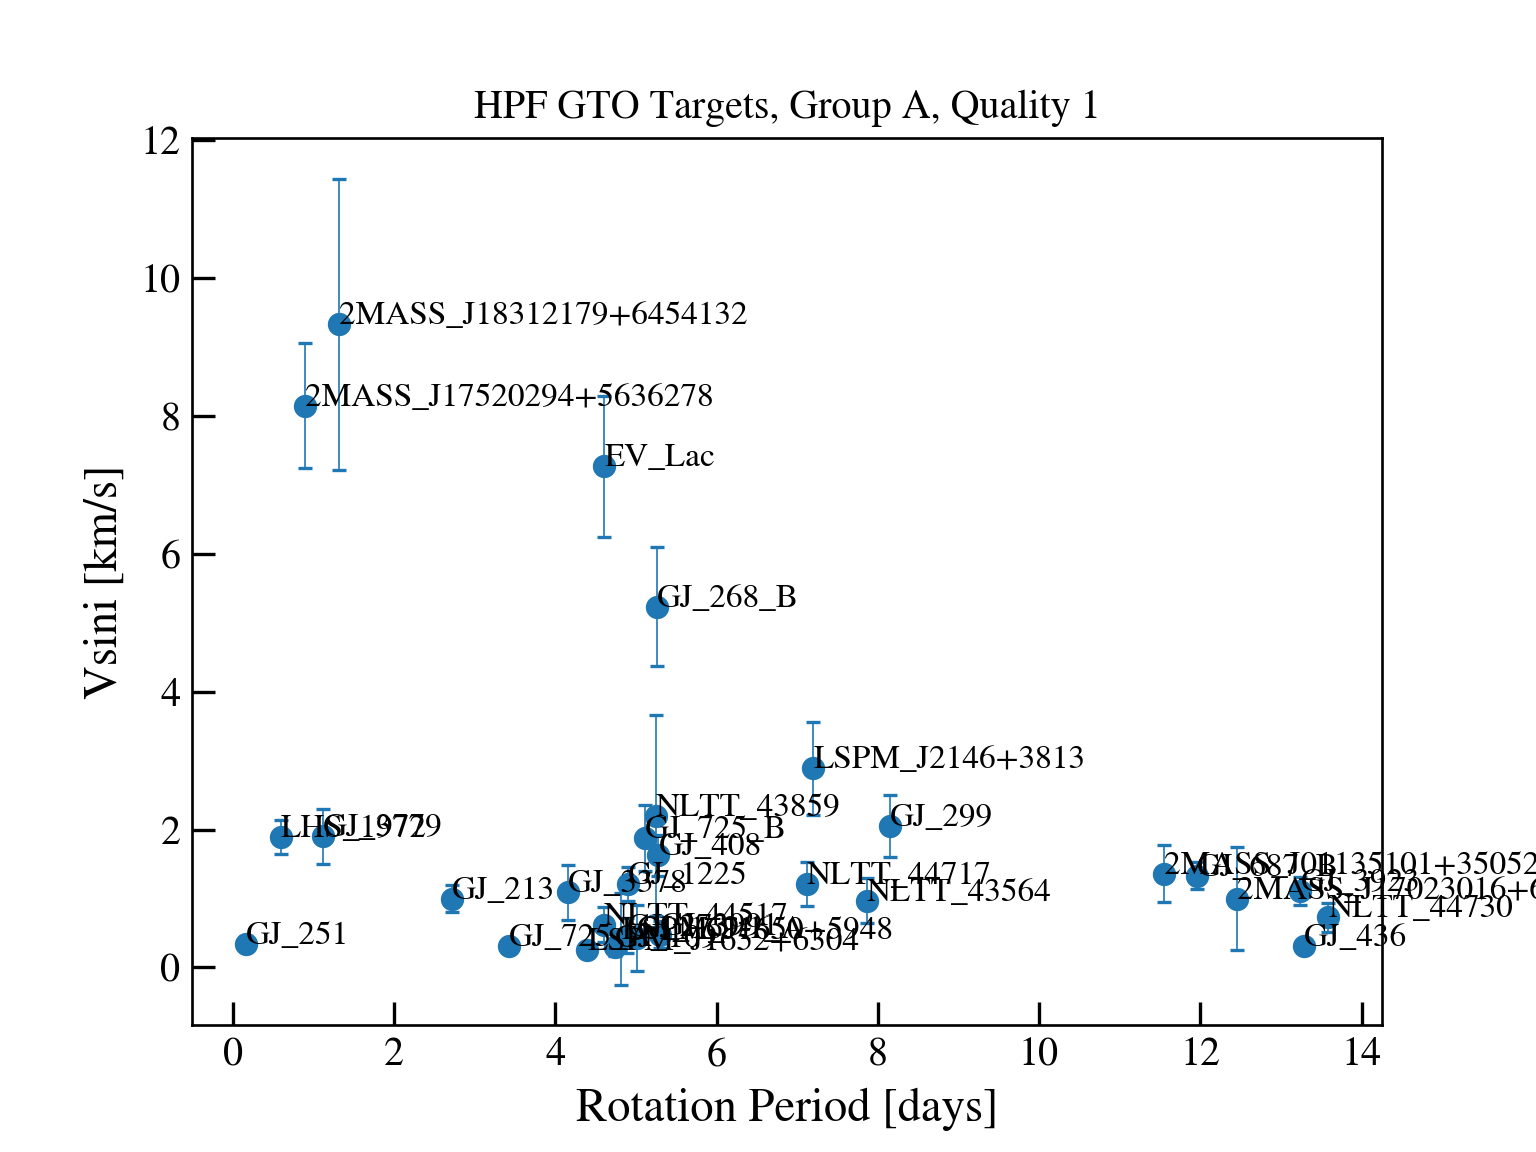

In [22]:
fig, ax = plt.subplots(dpi=100)
ax.errorbar(good_targets['max_period_1_gls'], good_targets['vsini'], good_targets['std vsini'], lw=0, elinewidth=0.5, marker='o',capsize=2)
        
ax.set_xlabel('Rotation Period [days]',fontsize=14)
ax.set_ylabel('Vsini [km/s]',fontsize=14)
ax.set_title('HPF GTO Targets, Group A, Quality 1')

ax.tick_params(labelsize=12)

for i in range(len(good_targets)):
    ax.text(good_targets['max_period_1_gls'].values[i], good_targets['vsini'].values[i],good_targets['target'].values[i],fontsize=10)
    
#fig.savefig('../output/vsini_rot.png', dpi=200)

In [19]:
#%matplotlib nbagg

In [11]:
best_targets = pd.read_csv('../output/best_targets.csv')
best_targets

,ticid,target,group,quality,teff,std teff,logg,std logg,feh,std feh,vsini,std vsini,tess_notes,likely_rotation_period,tess_clear_modulation,tess_flare,tess_nearby_stars,brightest_fratio,max_period_1_gls,max_period_1_gls_fap,TESS_time_baseline,TESS_std_2min,max_period_2_gls,max_period_3_gls,max_period_2_gls_fap,max_period_3_gls_fap,max_period_1_gls_ncycles,TESS_nsectors,TESS_median_error_2min,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,233738219,2MASS_J18312179+6454132,A,1,3261.508,27.57945,4.959359,0.027372,-0.15600,0.043134,9.33,2.112882,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1 star 4mag fainter,0.061812,1.316854,6.570000e-75,298.92590,0.003380,0.658427,1.311078,5.520000e-59,3.020000e-54,227,10,0.002307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,359313701,2MASS_J17520294+5636278,A,1,3324.978,28.20000,4.830000,0.057537,-0.01604,0.078400,8.15,0.901000,"Very clear rotational modulation, looks like a...",NaN,Y,Y,1.5 mag fainter star in aperature,0.041788,0.900380,1.950000e-69,298.92630,0.003369,1.789978,1.811674,1.160000e-57,1.090000e-31,332,11,0.002147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,154101678,EV_Lac,A,1,3319.736,70.98080,4.954199,0.098386,-0.17600,0.129871,7.27,1.025384,"Very clear rotational modulation, not complete...",NaN,Y,Y,4 mag fainter not too close,0.030674,4.610022,4.300000e-19,23.05011,0.008596,2.561124,3.292873,4.160000e-09,4.810000e-09,5,1,0.000358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,321103619,GJ_268_B,A,1,3368.652,75.10000,4.940000,0.041000,-0.12355,0.075900,5.23,0.862000,Definitely clear modulation. Rotation period c...,NaN,Y,Y,4.5 mag fainter close,0.035225,5.263593,2.942750e-04,26.31796,0.002501,8.772655,4.386327,9.999578e-01,9.999750e-01,5,1,0.000533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68581262,GJ_687_B,A,1,3372.989,73.80000,4.850000,0.035565,-0.07590,0.047200,1.33,0.197000,"clear modulation, most likely period 5.2",NaN,Y,Y,N,0.000040,5.200000,1.000000e+00,298.92650,0.000409,12.455271,11.071352,1.000000e+00,1.000000e+00,25,9,0.000218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


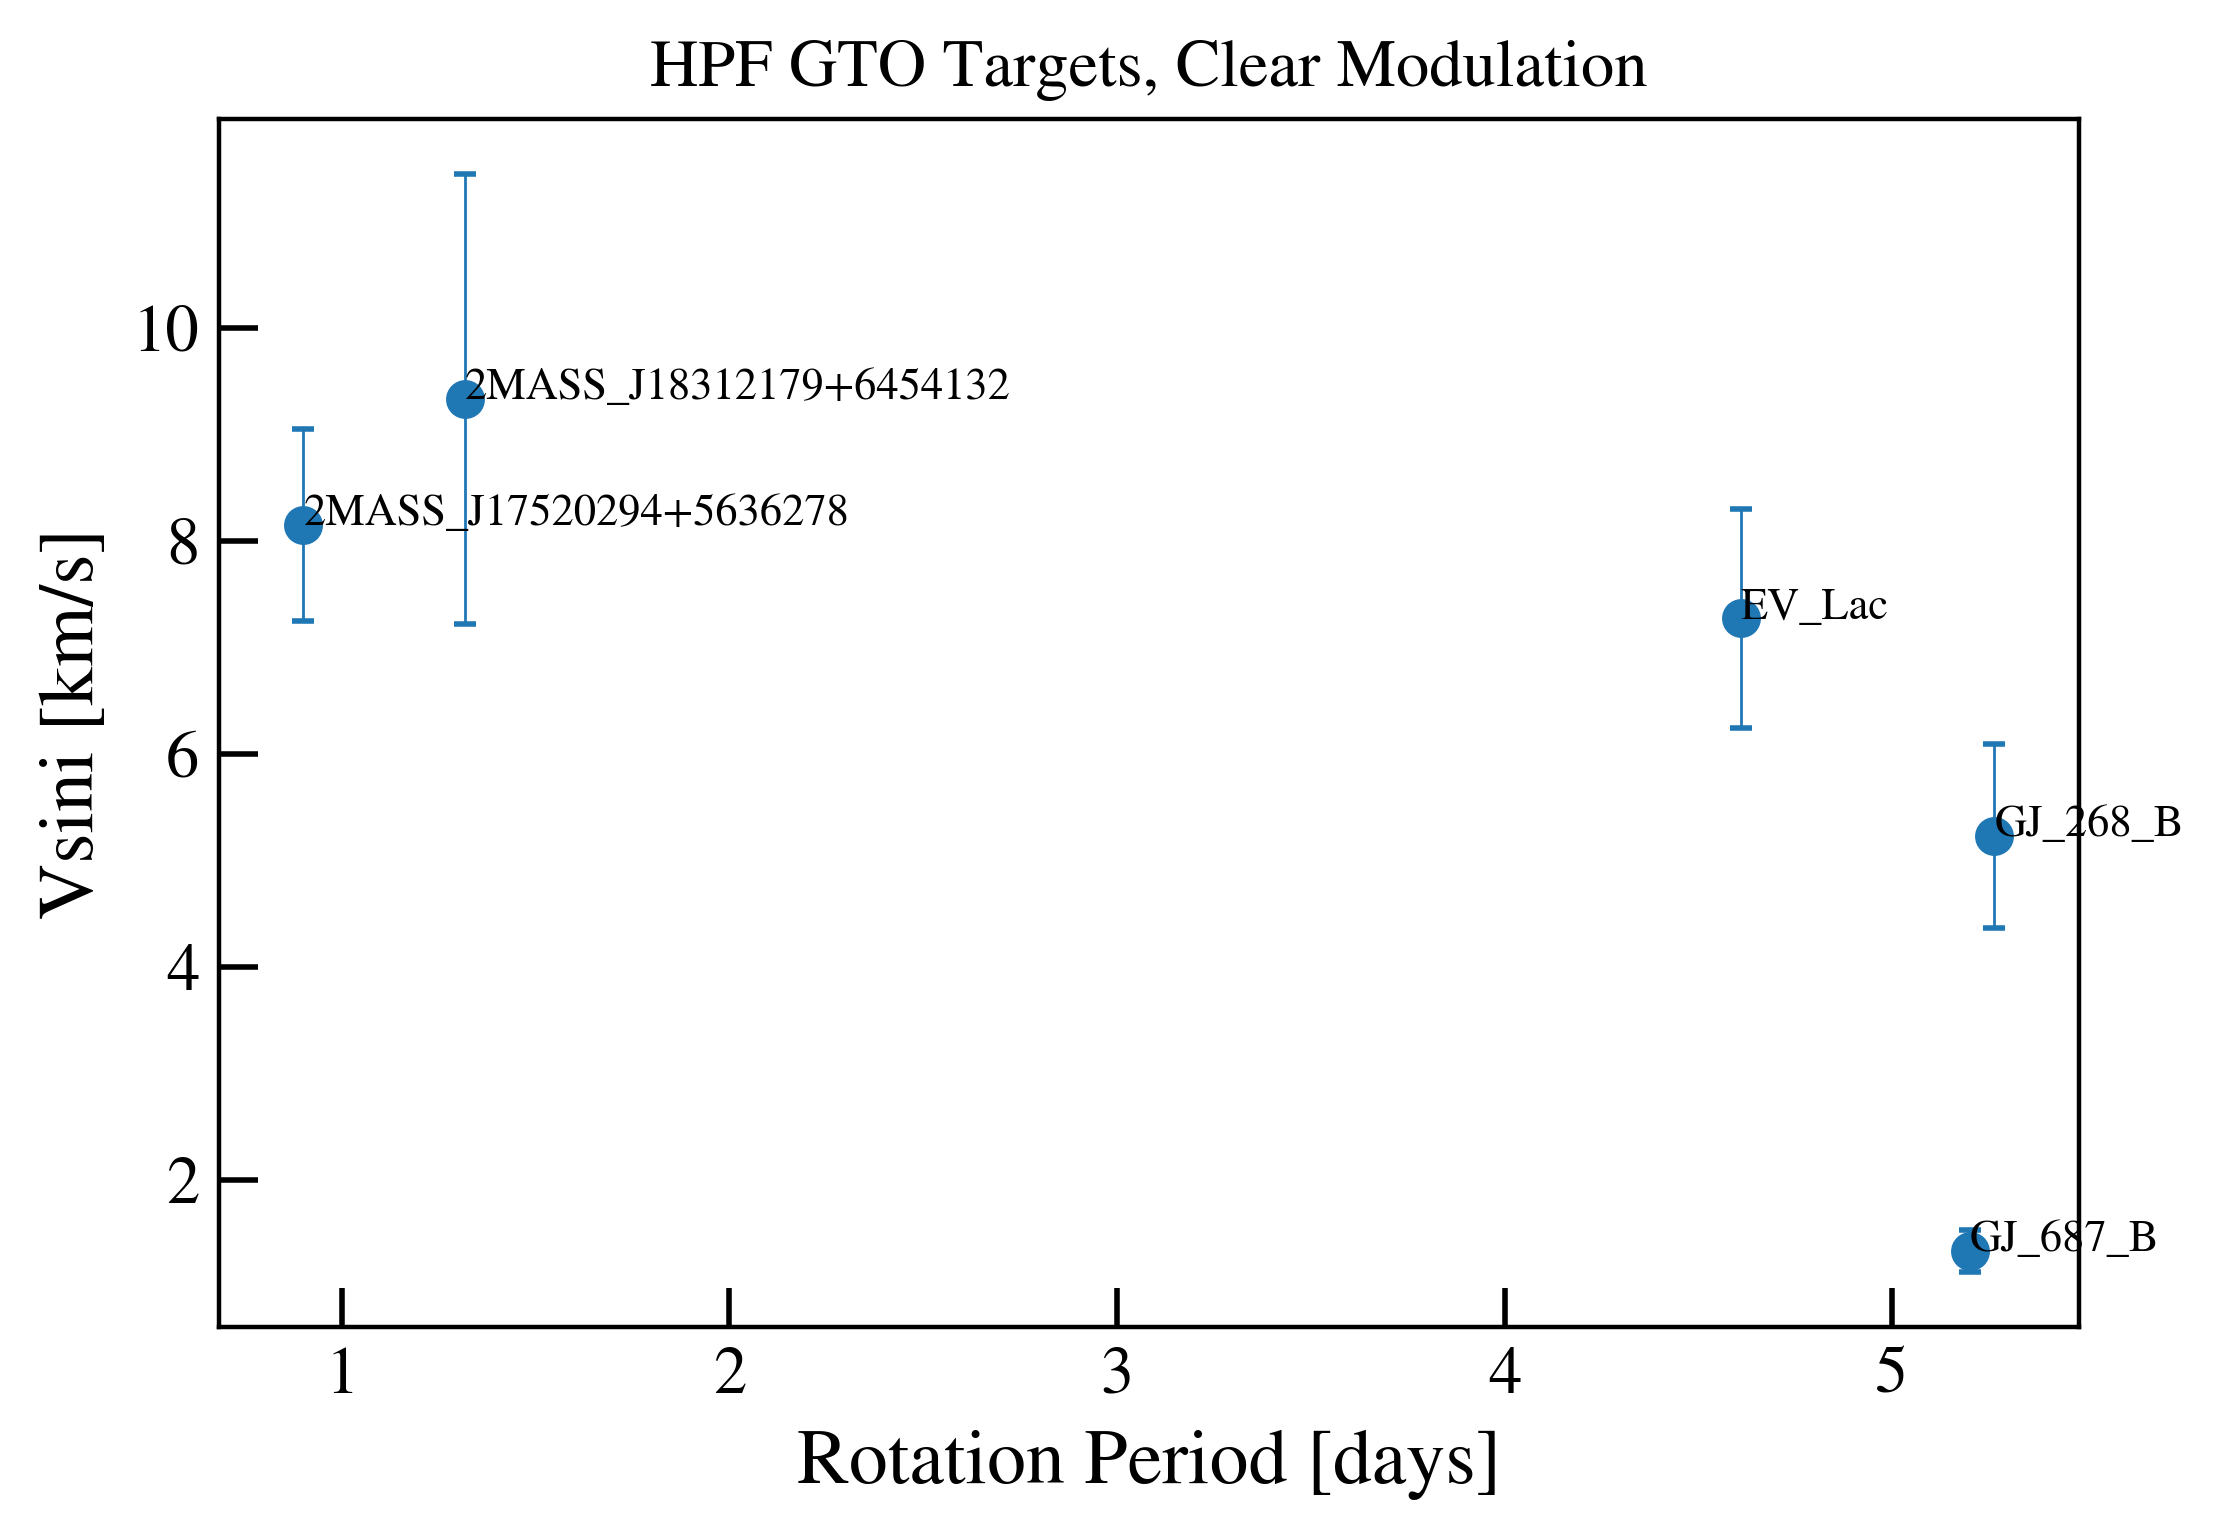

In [19]:
fig, ax = plt.subplots(dpi=200)
ax.errorbar(best_targets['max_period_1_gls'], best_targets['vsini'], best_targets['std vsini'], lw=0, elinewidth=0.5, marker='o',capsize=2)
        
ax.set_xlabel('Rotation Period [days]',fontsize=14)
ax.set_ylabel('Vsini [km/s]',fontsize=14)
ax.set_title('HPF GTO Targets, Clear Modulation')

ax.tick_params(labelsize=12)

for i in range(len(best_targets)):
    
    ax.text(best_targets['max_period_1_gls'].values[i], best_targets['vsini'].values[i],best_targets['target'].values[i],fontsize=8)
    

0    11.113418
1    24.240343
2     3.701812
3     4.146507
4     3.953759
Name: max_period_1_gls, dtype: float64


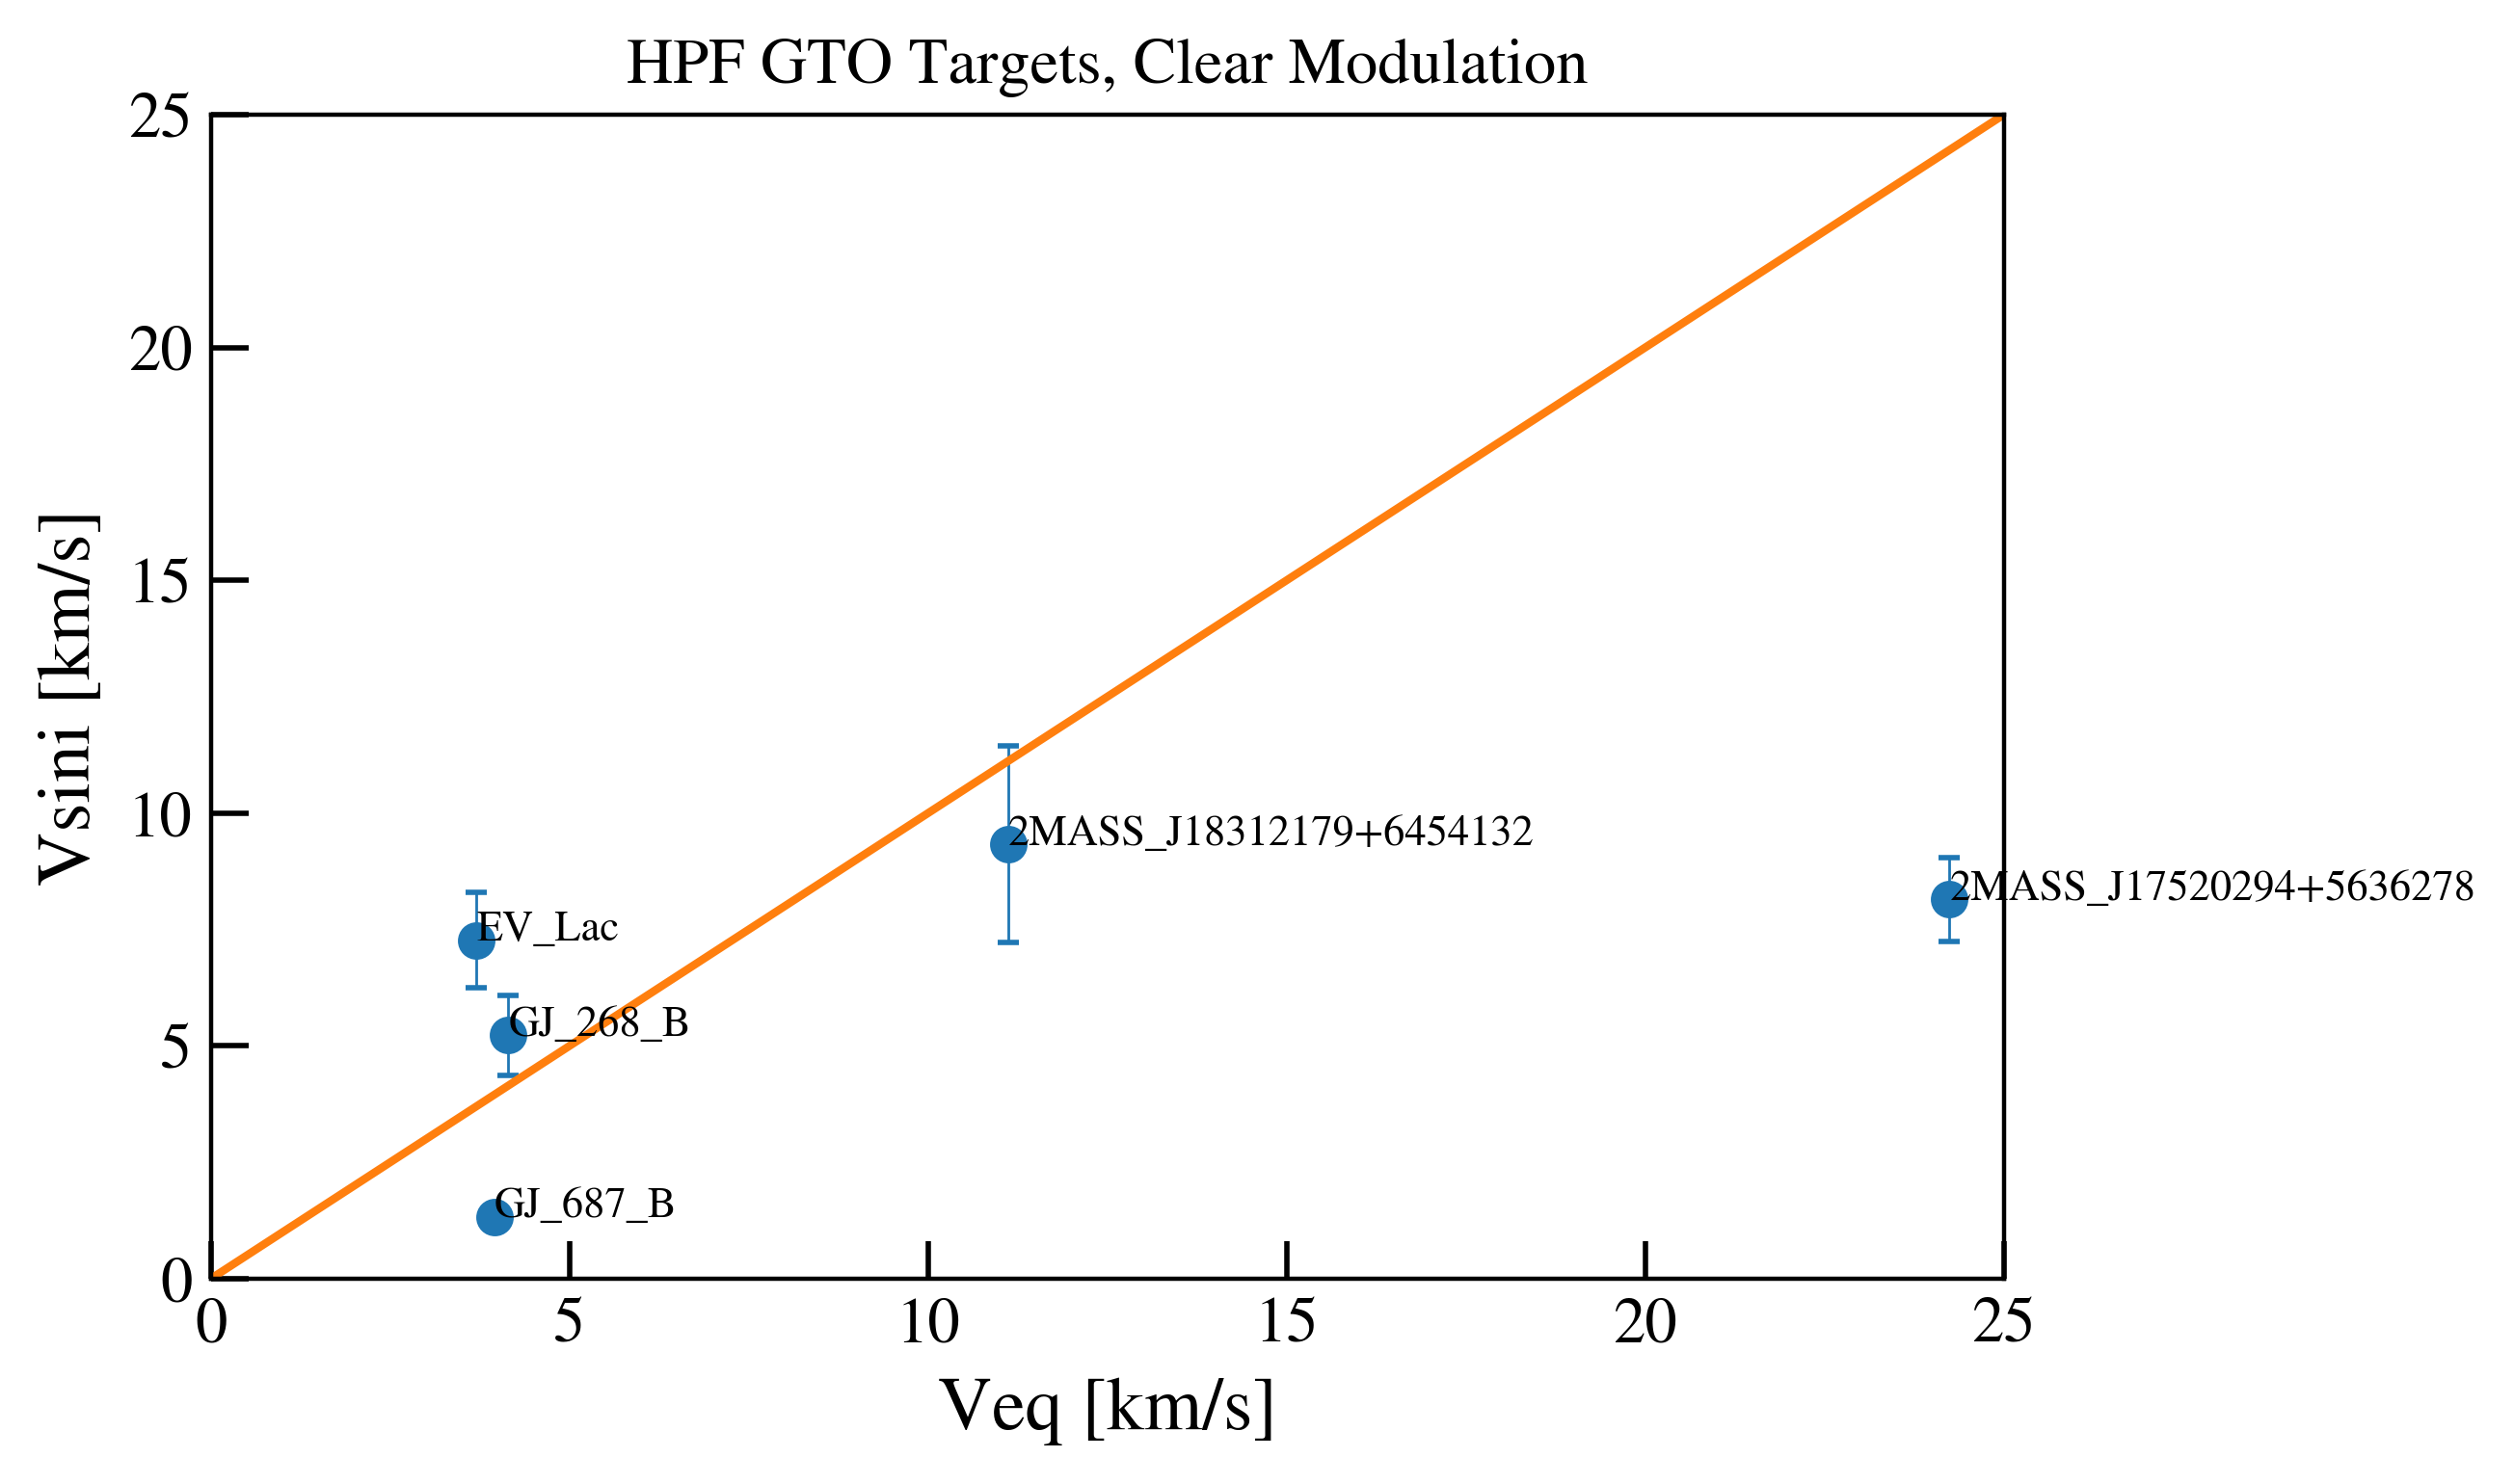

In [14]:
fig, ax = plt.subplots(dpi=200)
#veq = [1.607,3.009,0.459,0.515,0.491]
r = np.array([.289,.431,.337,.431,.406])*696340
veq = 2*np.pi*r/(best_targets['max_period_1_gls']*24*3600)
print(veq)
ax.errorbar(veq, best_targets['vsini'], best_targets['std vsini'], lw=0, elinewidth=0.5, marker='o',capsize=2)
ax.plot([0,25],[0,25])        
ax.set_xlabel('Veq [km/s]',fontsize=14)
ax.set_ylabel('Vsini [km/s]',fontsize=14)
ax.set_title('HPF GTO Targets, Clear Modulation')
ax.set_xlim(0,25)
ax.set_ylim(0,25)
ax.tick_params(labelsize=12)
#ax.set_aspect('equal')

for i in range(len(best_targets)):
    
    ax.text(veq[i], best_targets['vsini'].values[i],best_targets['target'].values[i],fontsize=8)
    

In [45]:
overview = pd.read_csv('INTESS_Master_Good.csv')
#print(len(overviewG))
#overviewG

In [51]:
overview = pd.read_csv('INTESS_Master_Bad.csv')
#print(len(overviewB))
#overviewB

In [52]:
for i in range(len(overview)):
    #name = overview['HPF_ID'].values[i].replace("_", ' ')
    print("{:4.0f} & {:4.0f} & {:4.0f} & {:6.3f} & {:6.3f} & {:6.3f} & {:6.3f} & {:6.2f} & {:6.2f} & {:6.3f} & {:6.3f} \\\\".format(overview['HPF_ID'].values[i], overview['teff'].values[i],overview['std teff'].values[i],overview['logg'].values[i],overview['std logg'].values[i],overview['feh'].values[i],overview['std feh'].values[i],overview['vsini'].values[i],overview['std vsini'].values[i],overview['max_period_1_gls'].values[i],np.log10(overview['max_period_1_gls_fap'].values[i])))

  99 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   0.24 &   0.12 & 24.545 &  0.000 \\
 100 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   0.26 &   0.12 &  4.745 & -15.975 \\
 101 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   6.91 &   0.20 &  0.462 & -7.796 \\
 102 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   0.21 &   0.11 &  7.809 &  0.000 \\
 103 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   0.28 &   0.11 &  6.800 &  0.000 \\
 104 & 3080 &    1 &  5.050 &  0.000 & -0.160 &  0.001 &   0.27 &   0.08 &  3.784 & -1.539 \\
 105 & 3080 &    4 &  5.050 &  0.001 & -0.160 &  0.004 &   0.29 &   0.14 &  5.297 &  0.000 \\
 106 & 3080 &    1 &  5.050 &  0.001 & -0.160 &  0.002 &   0.26 &   0.11 &  7.007 &  0.000 \\
 107 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   6.68 &   1.21 &  0.570 & -19.162 \\
 108 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 &   4.56 &   0.30 &  0.264 & -32.866 \\
 109 & 3080 &    0 &  5.050 &  0.000 & -0.160 &  0.000 & 

In [22]:
print(overview.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrr}
\toprule
 HPF\_ID &    teff &  std teff &   logg &  std logg &    feh &  std feh &  vsini &  std vsini &  max\_period\_1\_gls &  max\_period\_1\_gls\_fap \\
\midrule
      1 &  3471.0 &      64.0 &  4.803 &     0.022 & -0.017 &    0.093 &   1.36 &       0.41 &             11.55 &                  1.00 \\
      2 &  3080.0 &       0.0 &  5.050 &     0.000 & -0.160 &    0.000 &   0.24 &       0.12 &             24.54 &                  1.00 \\
      3 &  3375.0 &      33.0 &  4.880 &     0.013 & -0.068 &    0.018 &   1.00 &       0.74 &             12.46 &                  0.00 \\
      4 &  3325.0 &      28.0 &  4.830 &     0.058 & -0.016 &    0.078 &   8.15 &       0.90 &              0.90 &                  0.00 \\
      5 &  3262.0 &      28.0 &  4.959 &     0.027 & -0.156 &    0.043 &   9.33 &       2.11 &              1.32 &                  0.00 \\
      6 &  3080.0 &       0.0 &  5.050 &     0.000 & -0.160 &    0.000 &   7.94 &       0.53 &           